In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Understanding the Dataset Structure

In [3]:
# Load the CSV file into a DataFrame
df_goodreads = pd.read_csv('/content/drive/MyDrive/cleaned_goodreads_dataset - cleaned_goodreads_dataset.csv')
df_goodreads.head()

,ID,Author,Title,URL,SeriesName,Summary,Genres,Score,RatingsCount,ReviewsCount,Pages,PublishedDate,Popularity_ReadingNow,Popularity_Wishlisted
0,35053870,sarina bowen,brooklynaire,https://www.goodreads.com/book/show/35053870-b...,Brooklyn Bruisers #4,"You’d think a billion dollars, a professional ...","Romance, Sports, Sports Romance, Contemporary,...",4.07,20705,2322,298,2018-02-12,2261,13100
1,28869598,sarina bowen,hard hitter,https://www.goodreads.com/book/show/28869598-h...,Brooklyn Bruisers #2,"He’s a fighter in the rink, but he’s about to ...","Romance, Sports, Sports Romance, Contemporary,...",4.05,10818,1049,336,2017-01-03,495,5907
2,30627346,sarina bowen,pipe dreams,https://www.goodreads.com/book/show/30627346-p...,Brooklyn Bruisers #3,"A goalie has to trust his instincts, even when...","Romance, Sports, Sports Romance, Contemporary,...",3.92,9532,975,336,2017-05-02,348,5180
3,17561022,j. clare,stranded with a billionaire,https://www.goodreads.com/book/show/17561022-s...,Billionaire Boys Club #1,The Billionaire Boys Club is a secret society ...,"Romance, Contemporary Romance, Contemporary, E...",3.82,14878,1009,215,2013-04-16,335,8684
4,43728457,j. clare,beauty and the billionaire,https://www.goodreads.com/book/show/43728457-b...,Dirty Fairy Tales #1,Ruthless Bastard. White Knight. But I just cal...,"Romance, Contemporary, Contemporary Romance, E...",3.85,9954,691,336,2019-01-27,15700,7770


In [4]:
# Check the shape of the DataFrame
num_rows, num_columns = df_goodreads.shape
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

The dataset contains 105 rows and 14 columns.


In [5]:
# Display data types of each column
print("Data types of each column:\n")
print(df_goodreads.dtypes)

# Check for missing values in each column
print("\nNumber of missing values in each column:\n")
print(df_goodreads.isnull().sum())

Data types of each column:

ID                         int64
Author                    object
Title                     object
URL                       object
SeriesName                object
Summary                   object
Genres                    object
Score                    float64
RatingsCount               int64
ReviewsCount               int64
Pages                      int64
PublishedDate             object
Popularity_ReadingNow      int64
Popularity_Wishlisted      int64
dtype: object

Number of missing values in each column:

ID                       0
Author                   0
Title                    0
URL                      0
SeriesName               0
Summary                  0
Genres                   0
Score                    0
RatingsCount             0
ReviewsCount             0
Pages                    0
PublishedDate            0
Popularity_ReadingNow    0
Popularity_Wishlisted    0
dtype: int64


# 2. Descriptive Statistics of Numerical Variables

In [6]:
import pandas as pd

# Load the dataset
df_goodreads = pd.read_csv('/content/drive/MyDrive/cleaned_goodreads_dataset - cleaned_goodreads_dataset.csv')

# Convert the 'PublishedDate' column to datetime format and extract only the year
df_goodreads['PublishedDate'] = pd.to_datetime(df_goodreads['PublishedDate'], errors='coerce')
df_goodreads['PublishedDate'] = df_goodreads['PublishedDate'].dt.year

# Drop rows with missing 'PublishedDate'
df_goodreads.dropna(subset=['PublishedDate'], inplace=True)

# Convert 'PublishedDate' to integer
df_goodreads['PublishedDate'] = df_goodreads['PublishedDate'].astype(int)

# Specify the numerical columns for descriptive statistics
numerical_columns = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted', 'PublishedDate']

# Function to calculate and print descriptive statistics
def descriptive_stats(df, column):
    print(f"Descriptive statistics for {column}:\n")

    # Mean
    mean_value = df[column].mean()
    print(f"Mean: {mean_value}")

    # Median
    median_value = df[column].median()
    print(f"Median: {median_value}")

    # Mode
    mode_value = df[column].mode()[0]  # mode() returns a series, take the first element
    print(f"Mode: {mode_value}")

    # Standard deviation
    std_dev = df[column].std()
    print(f"Standard Deviation: {std_dev}")

    # Range
    range_value = df[column].max() - df[column].min()
    print(f"Range: {range_value}")

    # Minimum
    min_value = df[column].min()
    print(f"Min: {min_value}")

    # Maximum
    max_value = df[column].max()
    print(f"Max: {max_value}")

    # Percentiles
    percentile_25 = df[column].quantile(0.25)
    percentile_50 = df[column].quantile(0.50)
    percentile_75 = df[column].quantile(0.75)

    print(f"25%: {percentile_25}")
    print(f"50% (Median): {percentile_50}")
    print(f"75%: {percentile_75}")

    print("\n" + "="*50 + "\n")

# Loop through the numerical columns and calculate descriptive statistics
for column in numerical_columns:
    descriptive_stats(df_goodreads, column)

Descriptive statistics for Score:

Mean: 3.989333333333333
Median: 4.01
Mode: 4.05
Standard Deviation: 0.21215590542129198
Range: 1.21
Min: 3.26
Max: 4.47
25%: 3.86
50% (Median): 4.01
75%: 4.14


Descriptive statistics for RatingsCount:

Mean: 39644.60952380952
Median: 11558.0
Mode: 146
Standard Deviation: 105271.49990359134
Range: 929738
Min: 146
Max: 929884
25%: 3227.0
50% (Median): 11558.0
75%: 30630.0


Descriptive statistics for ReviewsCount:

Mean: 3548.209523809524
Median: 975.0
Mode: 49
Standard Deviation: 9898.746074139546
Range: 86559
Min: 25
Max: 86584
25%: 339.0
50% (Median): 975.0
75%: 2474.0


Descriptive statistics for Pages:

Mean: 311.8095238095238
Median: 336.0
Mode: 336
Standard Deviation: 108.28888493623248
Range: 458
Min: 72
Max: 530
25%: 244.0
50% (Median): 336.0
75%: 382.0


Descriptive statistics for Popularity_ReadingNow:

Mean: 4666.07619047619
Median: 1867.0
Mode: 0
Standard Deviation: 7767.0535729887715
Range: 57700
Min: 0
Max: 57700
25%: 436.0
50% (Median):

# Check for Normality with Shapiro-Wilk Test



In [7]:
import pandas as pd
from scipy.stats import shapiro

# Load the dataset
df_goodreads = pd.read_csv('/content/drive/MyDrive/cleaned_goodreads_dataset - cleaned_goodreads_dataset.csv')

# Convert the 'PublishedDate' column to datetime format and extract only the year
df_goodreads['PublishedDate'] = pd.to_datetime(df_goodreads['PublishedDate'], errors='coerce')
df_goodreads['PublishedDate'] = df_goodreads['PublishedDate'].dt.year

# Drop rows with missing 'PublishedDate'
df_goodreads.dropna(subset=['PublishedDate'], inplace=True)

# Convert 'PublishedDate' to integer
df_goodreads['PublishedDate'] = df_goodreads['PublishedDate'].astype(int)

# Specify the numerical columns for the Shapiro-Wilk normality test
numerical_columns = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted', 'PublishedDate']

# Function to perform the Shapiro-Wilk normality test
def check_normality(df, column):
    stat, p_value = shapiro(df[column].dropna())  # Shapiro test ignores missing values
    print(f"Shapiro-Wilk test for {column}:")
    print(f"Test statistic: {stat}")
    print(f"P-value: {p_value}")

    # Interpret the result
    if p_value > 0.05:
        print(f"The data in {column} looks normally distributed (fail to reject H0).\n")
    else:
        print(f"The data in {column} does not look normally distributed (reject H0).\n")

    print("="*50)

# Loop through the numerical columns and perform Shapiro-Wilk test for normality
for column in numerical_columns:
    check_normality(df_goodreads, column)

Shapiro-Wilk test for Score:
Test statistic: 0.9880443630395445
P-value: 0.475334993632342
The data in Score looks normally distributed (fail to reject H0).

Shapiro-Wilk test for RatingsCount:
Test statistic: 0.34874594643150847
P-value: 1.7155297130560512e-19
The data in RatingsCount does not look normally distributed (reject H0).

Shapiro-Wilk test for ReviewsCount:
Test statistic: 0.3396818188559274
P-value: 1.2977364430606935e-19
The data in ReviewsCount does not look normally distributed (reject H0).

Shapiro-Wilk test for Pages:
Test statistic: 0.9663018562428517
P-value: 0.00897214850017182
The data in Pages does not look normally distributed (reject H0).

Shapiro-Wilk test for Popularity_ReadingNow:
Test statistic: 0.5896019051387433
P-value: 1.1243729112711123e-15
The data in Popularity_ReadingNow does not look normally distributed (reject H0).

Shapiro-Wilk test for Popularity_Wishlisted:
Test statistic: 0.427056013652543
P-value: 2.1805661034243807e-18
The data in Popularit

# Visualization of Distributions

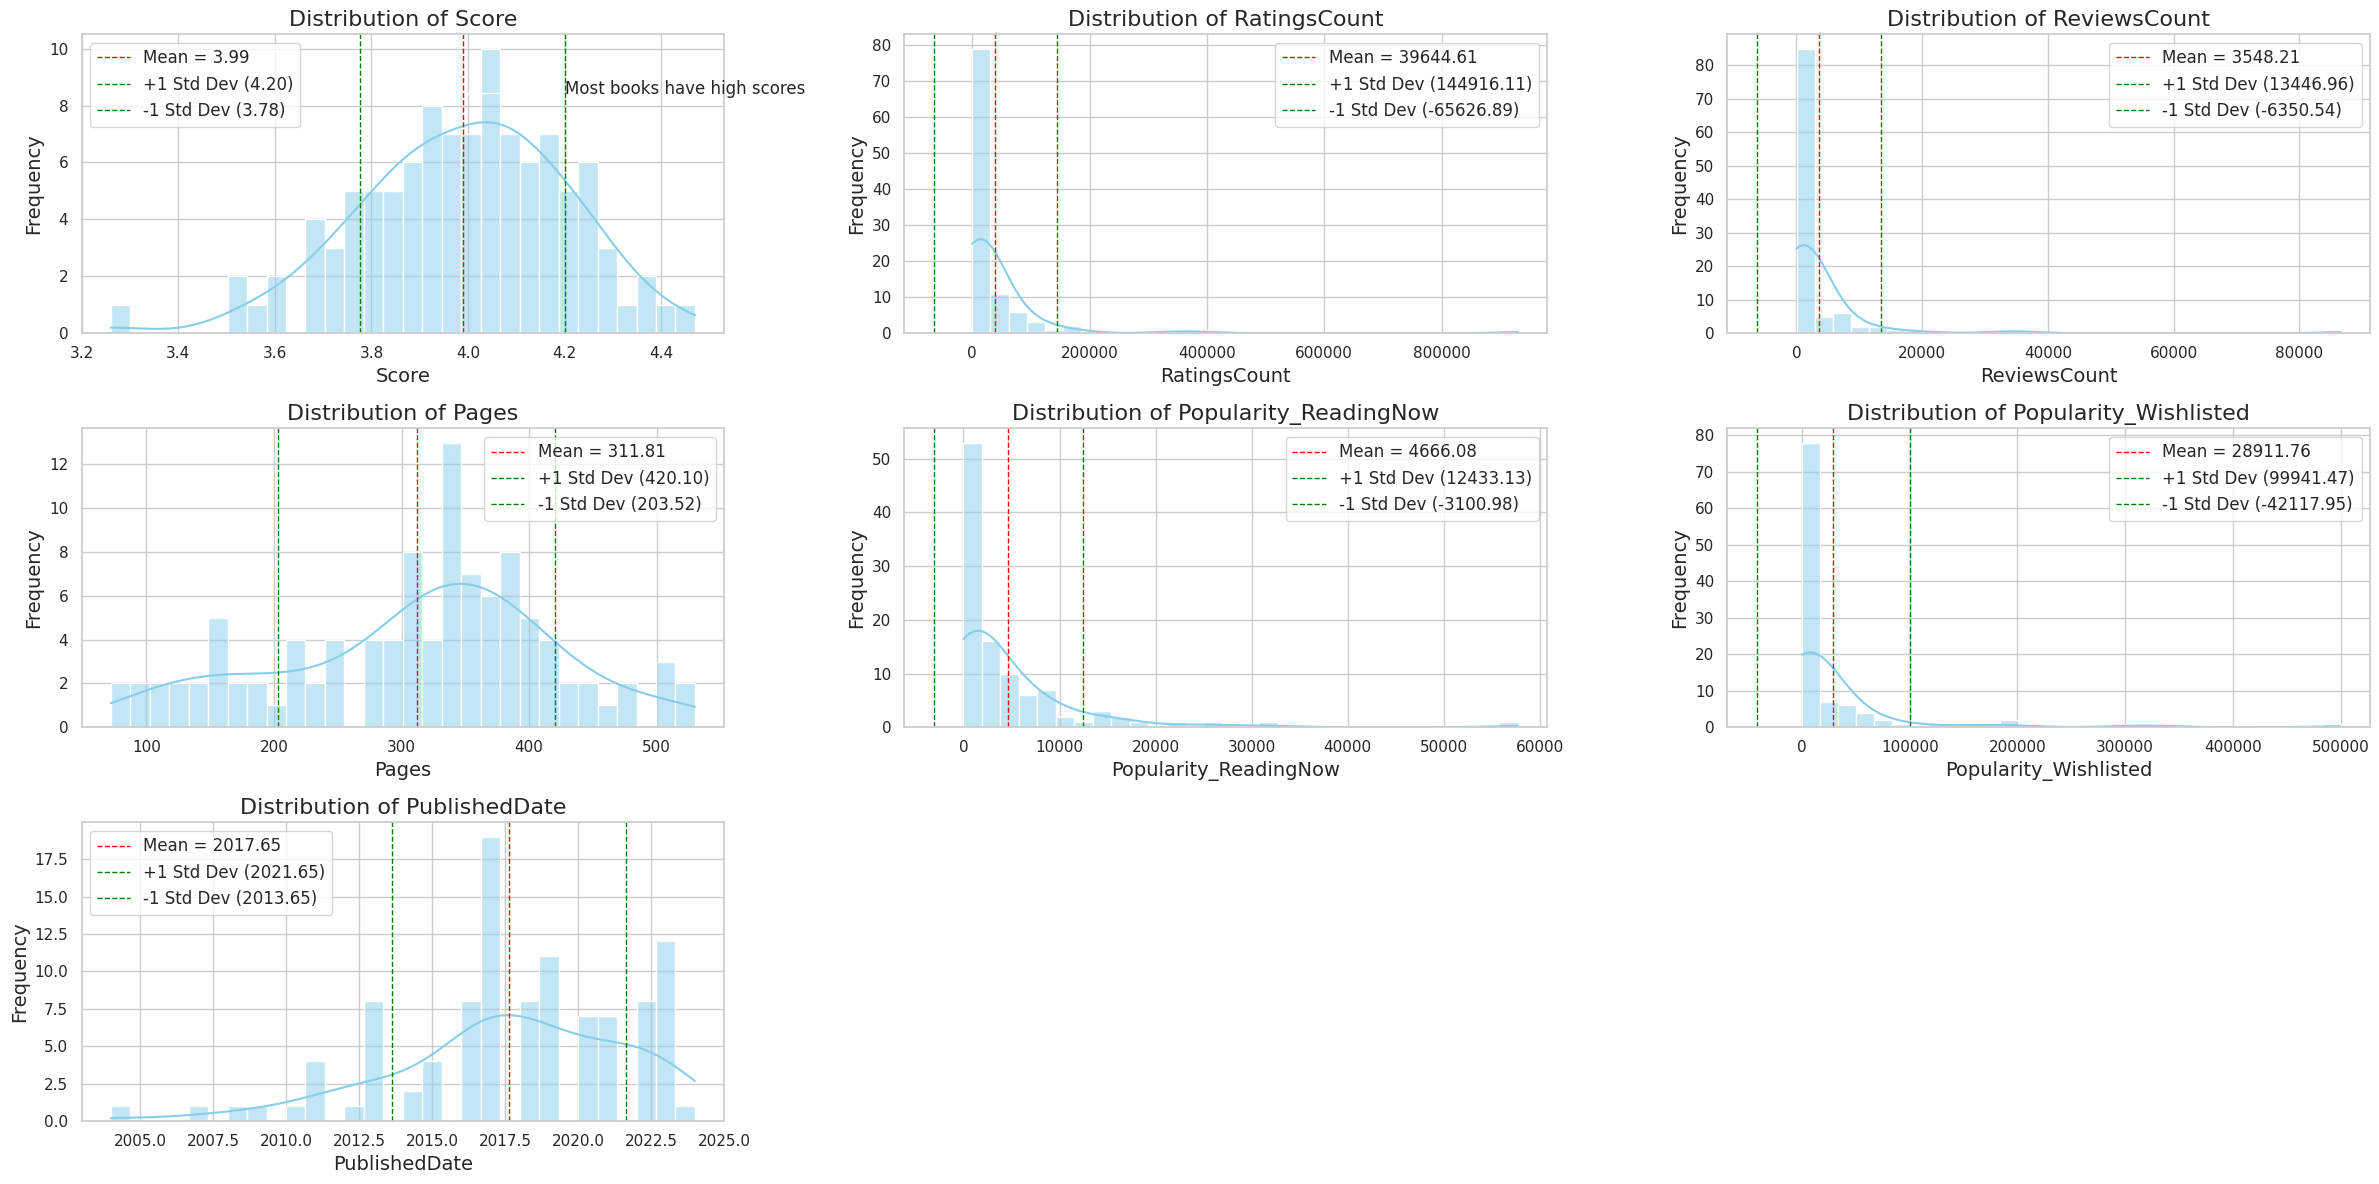

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

# Combined Visualization of Numerical Variables (Without Log Transformation)

# Define the list of numerical variables (excluding PublishedYear for now if it's absent)
numerical_vars = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted', 'PublishedDate']

# Define the number of plots
num_plots = len(numerical_vars)
cols = 3  # Number of columns
rows = num_plots // cols + int(num_plots % cols > 0)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(24, 12))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten to easily iterate

for idx, var in enumerate(numerical_vars):
    ax = axes[idx]

    # Plot histogram and KDE
    sns.histplot(df_goodreads[var], bins=30, kde=True, color='skyblue', ax=ax)

    # Calculate mean and standard deviation
    mean = df_goodreads[var].mean()
    std = df_goodreads[var].std()

    # Add mean and std lines
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean:.2f}')
    ax.axvline(mean + std, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev ({mean + std:.2f})')
    ax.axvline(mean - std, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev ({mean - std:.2f})')

    # Set titles and labels
    ax.set_title(f'Distribution of {var}', fontsize=16)
    ax.set_xlabel(var, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

    # Add legend
    ax.legend(fontsize=12)

    # Optional annotations
    if var == 'Score':
        ax.annotate('Most books have high scores', xy=(mean, ax.get_ylim()[1]*0.8),
                    xytext=(mean + std, ax.get_ylim()[1]*0.8),
                    arrowprops=dict(facecolor='black', arrowstyle='->'))

# Remove any empty subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Display the combined figure
plt.show()


<ipython-input-9-0b4d0bef8cf6>:85: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


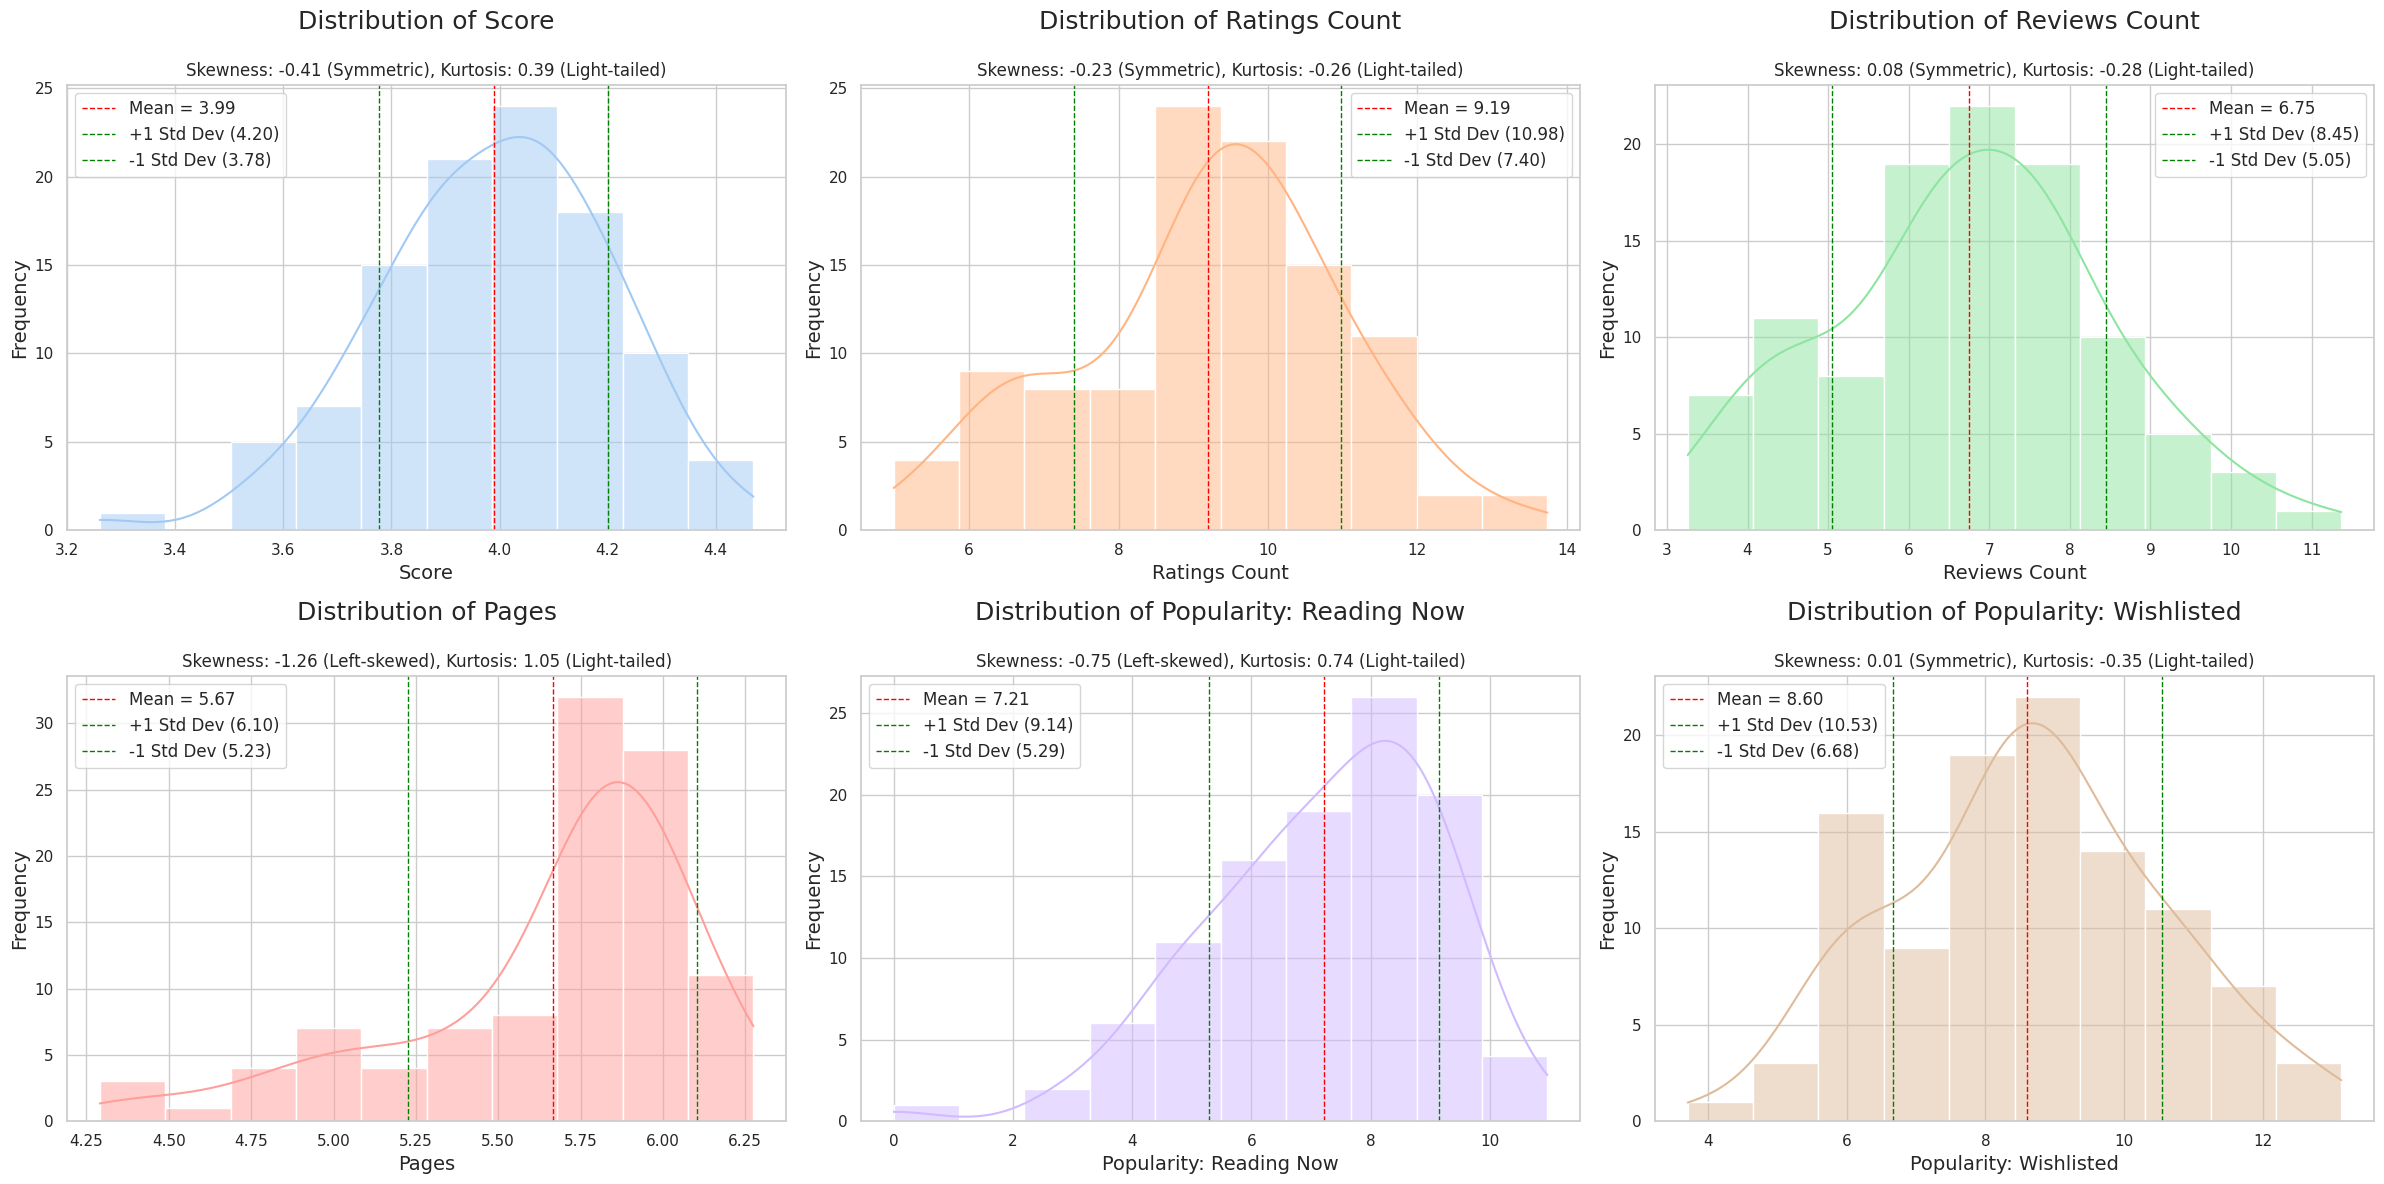

<ipython-input-9-0b4d0bef8cf6>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PublishedDate', data=df_goodreads, palette='pastel')


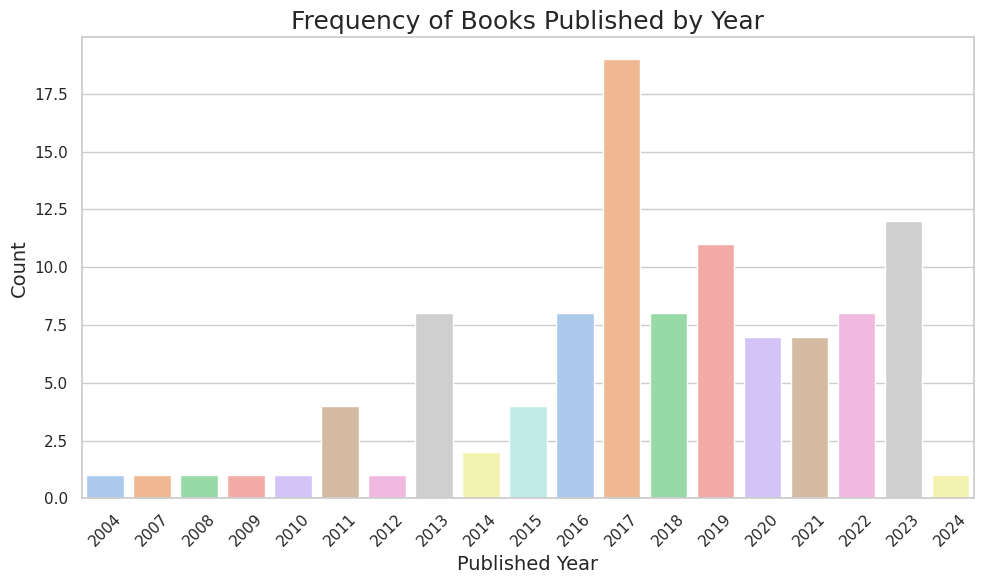

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Define the list of numerical variables (excluding PublishedDate for histogram)
numerical_vars = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Mapping of variable names to more readable names for plotting
name_mapping = {
    'RatingsCount': 'Ratings Count',
    'ReviewsCount': 'Reviews Count',
    'Popularity_ReadingNow': 'Popularity: Reading Now',
    'Popularity_Wishlisted': 'Popularity: Wishlisted',
    'Score': 'Score',
    'Pages': 'Pages',
}

# Define log-transformed variables
log_vars = ['RatingsCount', 'ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted', 'Pages']

# Define pastel colors for each variable
pastel_colors = sns.color_palette("pastel")

# Define the number of plots
num_plots = len(numerical_vars)
cols = 3  # Number of columns
rows = num_plots // cols + int(num_plots % cols > 0)  # Calculate required rows

# Create subplots for numerical variables
fig, axes = plt.subplots(rows, cols, figsize=(24, 12), constrained_layout=True)  # Adjust layout with constrained_layout=True
axes = axes.flatten()

for idx, var in enumerate(numerical_vars):
    ax = axes[idx]

    # Apply log transformation to skewed variables, exclude PublishedDate from log transformation
    if var in log_vars:
        data = np.log1p(df_goodreads[var])
    else:
        data = df_goodreads[var]

    # Get the display name for the variable
    title_var = name_mapping[var]

    # Calculate dynamic binning
    bin_count = int(np.sqrt(len(data)))  # Dynamic binning based on the size of the data

    # Plot histogram and KDE with distinct pastel colors
    sns.histplot(data, bins=bin_count, kde=True, color=pastel_colors[idx % len(pastel_colors)], ax=ax)

    # Calculate mean, standard deviation, skewness, and kurtosis
    mean = data.mean()
    std = data.std()
    skewness = skew(data)
    kurt = kurtosis(data)

    # Add mean and std lines
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean:.2f}')
    ax.axvline(mean + std, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev ({mean + std:.2f})')
    ax.axvline(mean - std, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev ({mean - std:.2f})')

    # Set titles and labels with skewness and kurtosis annotations
    skewness_annotation = "Left-skewed" if skewness < -0.5 else ("Right-skewed" if skewness > 0.5 else "Symmetric")
    kurtosis_annotation = "Heavy-tailed" if kurt > 3 else "Light-tailed"

    # Set the main title font larger than the annotation font
    ax.set_title(f'Distribution of {title_var}', fontsize=18, pad=40)  # Padding for title

    # Lower the annotation closer to the plot and adjust the font size
    ax.text(0.5, 1.03, f'Skewness: {skewness:.2f} ({skewness_annotation}), Kurtosis: {kurt:.2f} ({kurtosis_annotation})',
            transform=ax.transAxes, fontsize=12, ha='center', va='center')  # Lowered placement closer to the plot

    ax.set_xlabel(title_var, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

    # Add legend
    ax.legend(fontsize=12, loc='best')

# Remove any empty subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout using tight layout and constrained layout
plt.tight_layout()
plt.show()

# Plot for 'PublishedDate'
plt.figure(figsize=(10, 6))
sns.countplot(x='PublishedDate', data=df_goodreads, palette='pastel')
plt.title('Frequency of Books Published by Year', fontsize=18)  # Main title larger for bar plot
plt.xlabel('Published Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-10-d0ed870ec225>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=df_melted, palette=pastel_palette,
<ipython-input-10-d0ed870ec225>:28: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.boxplot(x='Variable', y='Value', data=df_melted, palette=pastel_palette,


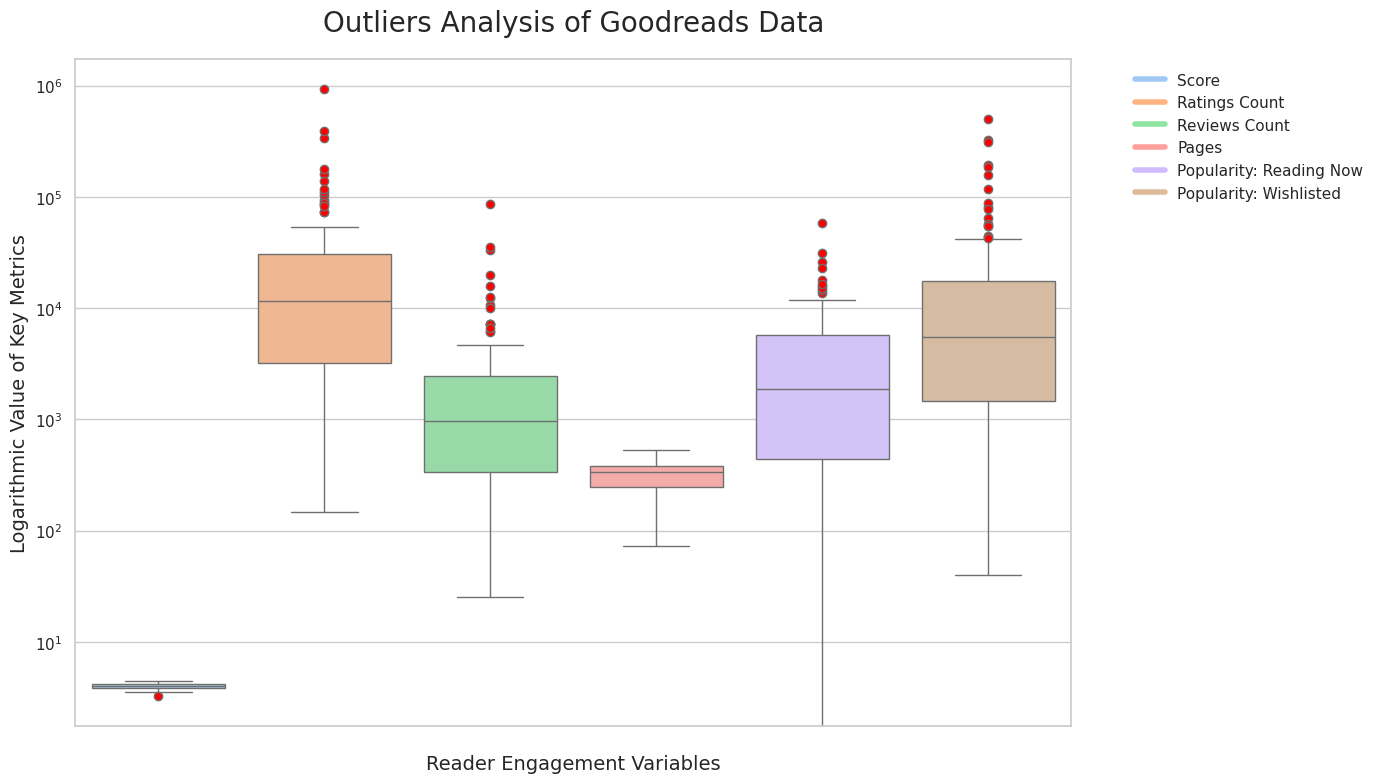

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Mapping of variable names to more readable names for plotting
name_mapping = {
    'RatingsCount': 'Ratings Count',
    'ReviewsCount': 'Reviews Count',
    'Popularity_ReadingNow': 'Popularity: Reading Now',
    'Popularity_Wishlisted': 'Popularity: Wishlisted',
    'Score': 'Score',
    'Pages': 'Pages',
}

# List of numerical variables to analyze for outliers
outlier_vars = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Assuming df_goodreads contains the dataset and mapping to readable names
df_melted = df_goodreads[outlier_vars].rename(columns=name_mapping).melt(var_name='Variable', value_name='Value')

# Set up pastel color palette
pastel_palette = sns.color_palette("pastel")

# Set up the matplotlib figure for a single plot
plt.figure(figsize=(14, 8))

# Create a boxplot with seaborn
sns.boxplot(x='Variable', y='Value', data=df_melted, palette=pastel_palette,
            flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none'))

# Adjust the y-axis to use a log scale
plt.yscale('log')

# Title moved slightly higher for clarity and font adjusted
plt.title('Outliers Analysis of Goodreads Data', fontsize=20, pad=20)

# Modify the x-axis label to be more descriptive and adjust its position (slightly lower)
plt.xlabel('Reader Engagement Variables', fontsize=14, labelpad=20)

# Modify the y-axis label for clarity
plt.ylabel('Logarithmic Value of Key Metrics', fontsize=14)

# Remove the x-axis tick labels for each variable
plt.xticks([])

# Add gridlines
plt.grid(True)

# Create a legend with color coding but without the title
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in pastel_palette]
labels = [name_mapping[var] for var in outlier_vars]
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Show the final plot
plt.tight_layout()
plt.show()

# Exploring the Relationship Between Goodreads Metrics and Book Appreciation Scores


Mounted at /content/drive
   RatingsCount  Log_RatingsCount  ReviewsCount  Log_ReviewsCount  \
0         20705          9.938179          2322          7.750615   
1         10818          9.289059          1049          6.956545   
2          9532          9.162515           975          6.883463   
3         14878          9.607706          1009          6.917706   
4          9954          9.205830           691          6.539586   

   Popularity_ReadingNow  Log_Popularity_ReadingNow  Popularity_Wishlisted  \
0                   2261                   7.724005                  13100   
1                    495                   6.206576                   5907   
2                    348                   5.855072                   5180   
3                    335                   5.817111                   8684   
4                  15700                   9.661480                   7770   

   Log_Popularity_Wishlisted  
0                   9.480444  
1                   8.684063

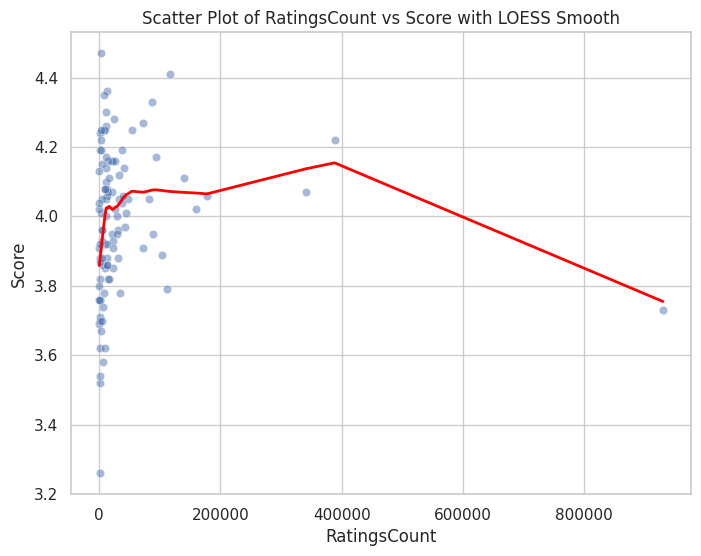

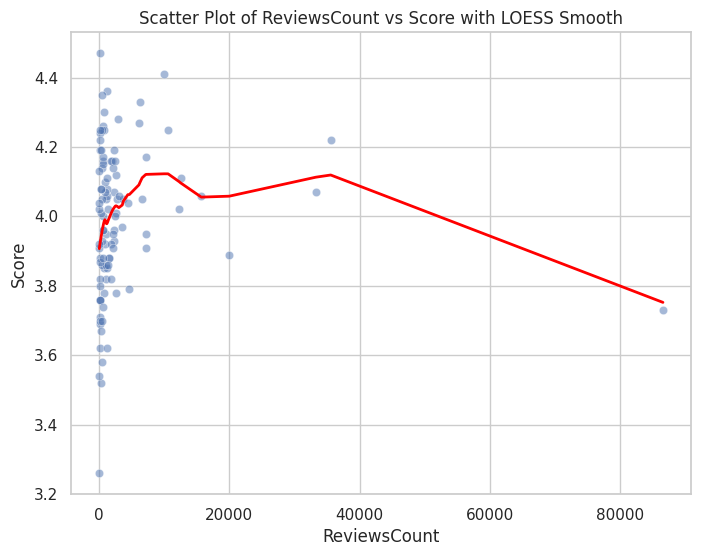

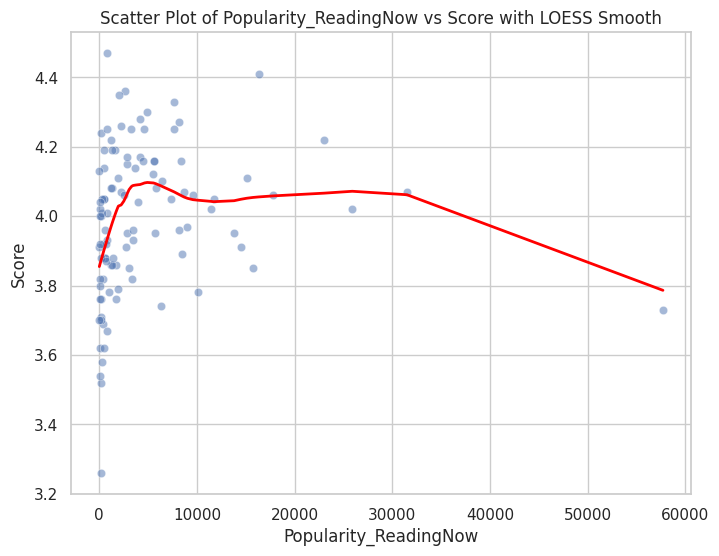

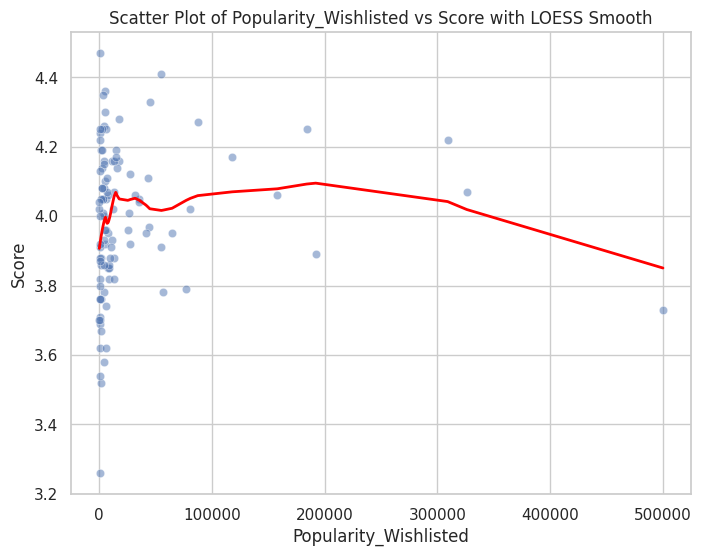


### Reduced Variance Inflation Factor (VIF) ###

                 Variable       VIF
                    const 27.692471
         Log_RatingsCount  4.722179
Log_Popularity_ReadingNow  2.955130
Log_Popularity_Wishlisted  5.944163

### PCA Explained Variance ###

[0.88353371 0.08035037]

### Lasso Regression - Best Alpha ###

0.0016061545164140364

### Lasso Regression - Coefficients ###

Log_RatingsCount             0.074860
Log_ReviewsCount            -0.000000
Log_Popularity_ReadingNow    0.105368
Log_Popularity_Wishlisted   -0.112838
dtype: float64

### Features Selected by Lasso ###

['Log_RatingsCount', 'Log_Popularity_ReadingNow', 'Log_Popularity_Wishlisted']


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Ensure plots are rendered inline
%matplotlib inline

# Load Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Load the CSV file into a DataFrame
df_goodreads = pd.read_csv('/content/drive/MyDrive/cleaned_goodreads_dataset - cleaned_goodreads_dataset.csv')

# List of variables to log-transform
variables_to_log = ['RatingsCount', 'ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Apply log transformation (add 1 to avoid log(0))
for var in variables_to_log:
    df_goodreads[f'Log_{var}'] = np.log1p(df_goodreads[var])

# Verify transformation
print(df_goodreads[['RatingsCount', 'Log_RatingsCount',
                   'ReviewsCount', 'Log_ReviewsCount',
                   'Popularity_ReadingNow', 'Log_Popularity_ReadingNow',
                   'Popularity_Wishlisted', 'Log_Popularity_Wishlisted']].head())

# Define dependent and independent variables
dependent_var = 'Score'
independent_vars = ['RatingsCount', 'ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']
log_independent_vars = ['Log_RatingsCount', 'Log_ReviewsCount', 'Log_Popularity_ReadingNow', 'Log_Popularity_Wishlisted']

# Initialize lists to store correlation results
correlation_results = []

# Calculate Spearman correlations
for var in independent_vars:
    corr, p = spearmanr(df_goodreads[var], df_goodreads[dependent_var])
    correlation_results.append({'Variable Pair': f"{var} and {dependent_var}",
                                'Correlation': corr,
                                'P-value': p})

# Create a DataFrame for correlation results
corr_df = pd.DataFrame(correlation_results)

# Apply Holm-Bonferroni correction
p_values = corr_df['P-value'].values
reject, pvals_corrected, _, _ = multipletests(p_values, method='holm')

# Add corrected p-values and significance to the DataFrame
corr_df['Corrected P-value'] = pvals_corrected
corr_df['Significant'] = reject

# Calculate effect sizes (r²)
corr_df['Effect Size (r²)'] = corr_df['Correlation']**2

# Reorder columns for clarity
corr_df = corr_df[['Variable Pair', 'Correlation', 'Effect Size (r²)',
                   'P-value', 'Corrected P-value', 'Significant']]

# Display the correlation results
print("### Spearman Correlation Analysis ###\n")
print(corr_df.to_string(index=False))

# Select log-transformed independent variables for VIF calculation
indep_vars_log = ['Log_RatingsCount', 'Log_ReviewsCount', 'Log_Popularity_ReadingNow', 'Log_Popularity_Wishlisted']

# Prepare the design matrix by adding a constant
X = df_goodreads[indep_vars_log]
X = sm.add_constant(X)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

# Display VIF results
print("\n### Variance Inflation Factor (VIF) ###\n")
print(vif_data.to_string(index=False))

# Calculate Spearman correlation matrix for log-transformed independent variables
corr_matrix, p_matrix = spearmanr(df_goodreads[indep_vars_log])

# Convert the correlation matrix to a DataFrame
corr_matrix_df = pd.DataFrame(corr_matrix, index=indep_vars_log, columns=indep_vars_log)

# Display the correlation matrix
print("\n### Spearman Correlation Matrix of Independent Variables (Transformed) ###\n")
print(corr_matrix_df)

print("\n### Detailed Interpretation of Correlation and Effect Sizes ###\n")

for index, row in corr_df.iterrows():
    var_pair = row['Variable Pair']
    corr = row['Correlation']
    effect_size = row['Effect Size (r²)']
    p_val = row['P-value']
    p_corr = row['Corrected P-value']
    significant = row['Significant']

    print(f"**{var_pair}:**")
    print(f"- **Correlation (ρ):** {corr:.3f}")
    print(f"- **Effect Size (r²):** {effect_size:.3f} ({effect_size*100:.1f}% of variance explained)")
    print(f"- **P-value:** {p_val:.5f}")
    print(f"- **Corrected P-value:** {p_corr:.5f}")
    print(f"- **Significant after Correction:** {'Yes' if significant else 'No'}\n")

### 1. Assess Monotonicity ###

# Plotting scatter plots with LOESS smooth lines
for var in independent_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_goodreads[var], y=df_goodreads[dependent_var], alpha=0.5)
    sns.regplot(x=df_goodreads[var], y=df_goodreads[dependent_var],
                scatter=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 2})
    plt.title(f'Scatter Plot of {var} vs {dependent_var} with LOESS Smooth')
    plt.xlabel(var)
    plt.ylabel(dependent_var)
    plt.show()

### 2. Addressing Multicollinearity ###

#### 2.1. Option 1: Variable Selection (Remove One of the Highly Correlated Variables) ####

# Option 1: Remove 'Log_ReviewsCount' due to high correlation with 'Log_RatingsCount'
indep_vars_log_reduced = ['Log_RatingsCount', 'Log_Popularity_ReadingNow', 'Log_Popularity_Wishlisted']

# Prepare the design matrix by adding a constant
X_reduced = df_goodreads[indep_vars_log_reduced]
X_reduced = sm.add_constant(X_reduced)

# Calculate VIF for the reduced model
vif_data_reduced = pd.DataFrame()
vif_data_reduced['Variable'] = X_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_reduced.values, i)
                           for i in range(X_reduced.shape[1])]

# Display reduced VIF results
print("\n### Reduced Variance Inflation Factor (VIF) ###\n")
print(vif_data_reduced.to_string(index=False))

#### 2.2. Option 2: Principal Component Analysis (PCA) ####

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_goodreads[indep_vars_log])

# Apply PCA
pca = PCA(n_components=2)  # Adjust number of components based on explained variance
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Combine with the dependent variable
regression_df_pca = pd.concat([pca_df, df_goodreads[dependent_var]], axis=1)

# Display explained variance
print("\n### PCA Explained Variance ###\n")
print(pca.explained_variance_ratio_)

#### 2.3. Option 3: Lasso Regression ####

# Define features and target
X = df_goodreads[indep_vars_log]
y = df_goodreads[dependent_var]

# Split the data into training and testing sets for validation
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit LassoCV
lasso = LassoCV(cv=5, random_state=42).fit(X_train_scaled, y_train)

# Best alpha
print("\n### Lasso Regression - Best Alpha ###\n")
print(lasso.alpha_)

# Coefficients
coef = pd.Series(lasso.coef_, index=indep_vars_log)
print("\n### Lasso Regression - Coefficients ###\n")
print(coef)

# Features selected by Lasso (non-zero coefficients)
selected_features = coef[coef != 0].index.tolist()
print("\n### Features Selected by Lasso ###\n")
print(selected_features)


In [12]:
### 3. Performing Regression Analysis After Addressing Multicollinearity ###

#### 3.1. Regression with Reduced Variables (Option 1) ####

# Define dependent and independent variables for reduced model
X_reduced = df_goodreads[indep_vars_log_reduced]
X_reduced = sm.add_constant(X_reduced)
y_reduced = df_goodreads[dependent_var]

# Fit Ordinary Least Squares (OLS) regression
model_reduced = sm.OLS(y_reduced, X_reduced).fit()

# Display regression results
print("\n### OLS Regression Results with Reduced Variables ###\n")
print(model_reduced.summary())

#### 3.2. Regression with PCA Components (Option 2) ####

# Define dependent and independent variables
X_pca = regression_df_pca[['PC1', 'PC2']]
X_pca = sm.add_constant(X_pca)
y_pca = regression_df_pca[dependent_var]

# Fit OLS regression
model_pca = sm.OLS(y_pca, X_pca).fit()

# Display regression results
print("\n### OLS Regression Results with PCA Components ###\n")
print(model_pca.summary())

#### 3.3. Regression with Lasso-Selected Features (Option 3) ####

# Use only the selected features from Lasso
X_selected = df_goodreads[selected_features]
X_selected = sm.add_constant(X_selected)
y_selected = df_goodreads[dependent_var]

# Fit OLS regression
model_lasso = sm.OLS(y_selected, X_selected).fit()

# Display regression results
print("\n### OLS Regression Results with Lasso-Selected Features ###\n")
print(model_lasso.summary())


### OLS Regression Results with Reduced Variables ###

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     9.148
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           2.07e-05
Time:                        18:05:28   Log-Likelihood:                 26.929
No. Observations:                 105   AIC:                            -45.86
Df Residuals:                     101   BIC:                            -35.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [13]:
### 4. Regularization Techniques: Ridge Regression and Lasso ###

#### 4.1. Ridge Regression ####

# Initialize and fit RidgeCV
ridge = RidgeCV(cv=5, scoring='neg_mean_squared_error').fit(X_train_scaled, y_train)

# Best alpha
print("\n### Ridge Regression - Best Alpha ###\n")
print(ridge.alpha_)

# Coefficients
coef_ridge = pd.Series(ridge.coef_, index=indep_vars_log)
print("\n### Ridge Regression - Coefficients ###\n")
print(coef_ridge)

# Predict and evaluate
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"\n### Ridge Regression - Test MSE: {mse_ridge:.4f} ###\n")

#### 4.2. Lasso Regression (Reiterated for Clarity) ####

# Predict and evaluate Lasso
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"\n### Lasso Regression - Test MSE: {mse_lasso:.4f} ###\n")


### Ridge Regression - Best Alpha ###

1.0

### Ridge Regression - Coefficients ###

Log_RatingsCount             0.085047
Log_ReviewsCount            -0.007808
Log_Popularity_ReadingNow    0.106172
Log_Popularity_Wishlisted   -0.115786
dtype: float64

### Ridge Regression - Test MSE: 0.0253 ###


### Lasso Regression - Test MSE: 0.0253 ###



In [14]:
### 5. Comprehensive Regression Analysis with Final Model Selection ###

# Final Model using Lasso-Selected Features
print("\n### Final OLS Regression with Lasso-Selected Features ###\n")
print(model_lasso.summary())

# Final Model using PCA Components
print("\n### Final OLS Regression with PCA Components ###\n")
print(model_pca.summary())


### Final OLS Regression with Lasso-Selected Features ###

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     9.148
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           2.07e-05
Time:                        18:05:28   Log-Likelihood:                 26.929
No. Observations:                 105   AIC:                            -45.86
Df Residuals:                     101   BIC:                            -35.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

# Creating Composite Popularity Index (CPI)


### Final Independent Variables for PCA ###

   Log_RatingsCount  Log_Popularity_ReadingNow  Log_Popularity_Wishlisted
0          9.938179                   7.724005                   9.480444
1          9.289059                   6.206576                   8.684063
2          9.162515                   5.855072                   8.552753
3          9.607706                   5.817111                   9.069353
4          9.205830                   9.661480                   8.958154

### Standardized Independent Variables ###

   Log_RatingsCount  Log_Popularity_ReadingNow  Log_Popularity_Wishlisted
0          0.417746                   0.266286                   0.456060
1          0.053319                  -0.525549                   0.041291
2         -0.017725                  -0.708973                  -0.027097
3          0.232213                  -0.728782                   0.241957
4          0.006593                   1.277312                   0.184043

### PCA Explained Va

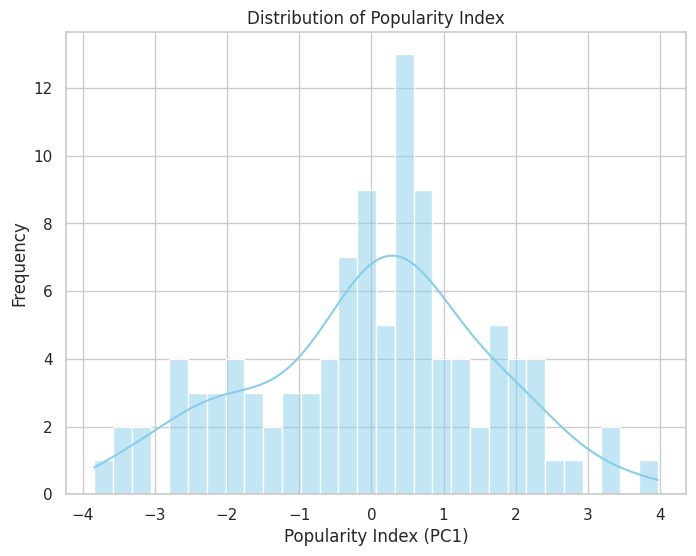


### PCA Loadings for Popularity Index ###

                           PC1_Loading
Log_RatingsCount              0.944524
Log_Popularity_ReadingNow     0.913793
Log_Popularity_Wishlisted     0.965203

### OLS Regression Results with Popularity Index ###

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     7.113
Date:                Mon, 28 Oct 2024   Prob (F-statistic):            0.00922
Time:                        18:14:37   Log-Likelihood:                 13.578
No. Observations:                  84   AIC:                            -23.16
Df Residuals:                      82   BIC:                            -18.30
Df Model:                           1                                         
Covariance Type:            nonrob

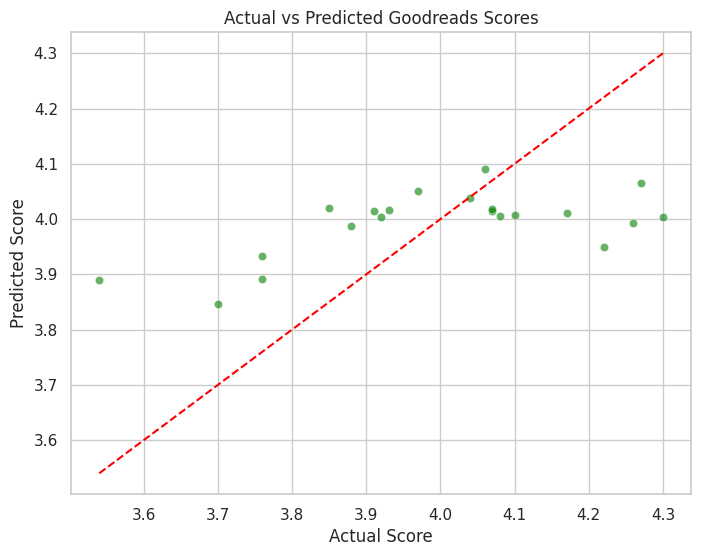

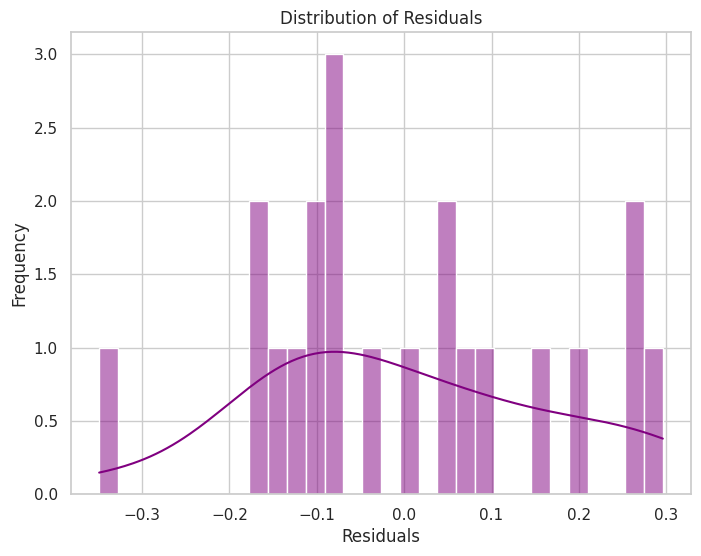

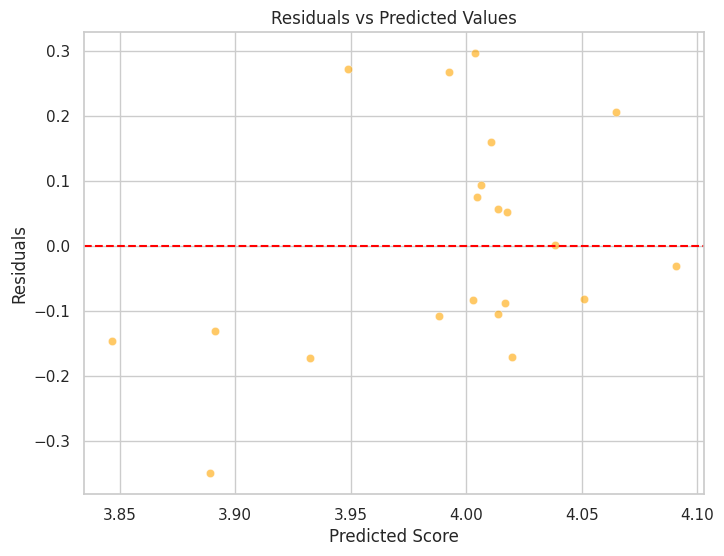


### Popularity Index saved to 'goodreads_with_popularity_index.csv' ###



In [15]:
# ### 6. Creating the Popularity Index ###

# #### 6.1. Excluding 'Log_ReviewsCount' to Address Multicollinearity ####

# Based on previous VIF and correlation analyses, we exclude 'Log_ReviewsCount'
indep_vars_final = ['Log_RatingsCount', 'Log_Popularity_ReadingNow', 'Log_Popularity_Wishlisted']

# Extract the final set of independent variables
X_final = df_goodreads[indep_vars_final]
y = df_goodreads[dependent_var]

# Display the first few rows to verify
print("\n### Final Independent Variables for PCA ###\n")
print(X_final.head())

# #### 6.2. Standardizing the Independent Variables ####

# It's crucial to standardize variables before PCA to ensure each contributes equally
scaler_final = StandardScaler()
X_final_scaled = scaler_final.fit_transform(X_final)

# Verify standardization
print("\n### Standardized Independent Variables ###\n")
print(pd.DataFrame(X_final_scaled, columns=indep_vars_final).head())

# #### 6.3. Applying PCA to Create the Popularity Index ####

# Initialize PCA to extract components that explain the majority of variance
pca_final = PCA(n_components=1)  # Using 1 component as PC1 explains 88.35% variance

# Fit PCA on the standardized data
principal_component = pca_final.fit_transform(X_final_scaled)

# Create a DataFrame for the principal component
df_goodreads['Popularity_Index'] = principal_component

# Display the explained variance
explained_variance = pca_final.explained_variance_ratio_[0]
print(f"\n### PCA Explained Variance for Popularity Index ###\nPC1 explains {explained_variance*100:.2f}% of the variance.\n")

# #### 6.4. Visualizing the Popularity Index ####

# Plot the distribution of the Popularity Index
plt.figure(figsize=(8, 6))
sns.histplot(df_goodreads['Popularity_Index'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Popularity Index')
plt.xlabel('Popularity Index (PC1)')
plt.ylabel('Frequency')
plt.show()

# #### 6.5. Interpreting the Popularity Index ####

# Display loadings to understand variable contributions
loadings = pca_final.components_.T * np.sqrt(pca_final.explained_variance_)
loading_df = pd.DataFrame(loadings, index=indep_vars_final, columns=['PC1_Loading'])
print("\n### PCA Loadings for Popularity Index ###\n")
print(loading_df)

# The loadings indicate how much each variable contributes to the PC1 (Popularity Index)
# Higher absolute values imply greater influence

# ### 7. Validating the Popularity Index Through Regression Modeling ###

# #### 7.1. Splitting the Data into Training and Testing Sets ####

# Split the data to validate the index's predictive power
X_train_index, X_test_index, y_train_index, y_test_index = train_test_split(
    df_goodreads[['Popularity_Index']], y, test_size=0.2, random_state=42
)

# #### 7.2. Adding a Constant to the Predictor for OLS ####

# Add a constant term for the intercept
X_train_index_const = sm.add_constant(X_train_index)
X_test_index_const = sm.add_constant(X_test_index)

# #### 7.3. Fitting OLS Regression with the Popularity Index ####

# Fit the OLS model
model_index = sm.OLS(y_train_index, X_train_index_const).fit()

# Display the regression summary
print("\n### OLS Regression Results with Popularity Index ###\n")
print(model_index.summary())

# #### 7.4. Predicting and Evaluating the Model ####

# Predict on the test set
y_pred_index = model_index.predict(X_test_index_const)

# Calculate Mean Squared Error (MSE) and R-squared
mse_index = mean_squared_error(y_test_index, y_pred_index)
r2_index = model_index.rsquared

print(f"\n### Popularity Index - Test MSE: {mse_index:.4f} ###")
print(f"### Popularity Index - Training R²: {r2_index:.4f} ###\n")

# #### 7.5. Comparing with Previous Models ####

# For comparison, let's recall the OLS Regression (Reduced Model) R²
# Assuming 'model_reduced' is already fitted earlier
print("\n### Comparison with OLS Regression (Reduced Model) ###\n")
print(f"Reduced Model Adjusted R²: {model_reduced.rsquared_adj:.4f}")
print(f"Popularity Index Model Adjusted R²: {model_index.rsquared_adj:.4f}\n")

# The higher Adjusted R² indicates a better model fit.

# #### 7.6. Visualizing Actual vs Predicted Scores ####

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_index, y=y_pred_index, alpha=0.6, color='green')
sns.lineplot(x=y_test_index, y=y_test_index, color='red', linestyle='--')  # Perfect prediction line
plt.title('Actual vs Predicted Goodreads Scores')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

# #### 7.7. Residual Analysis ####

# Calculate residuals
residuals = y_test_index - y_pred_index

# Plot residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_index, y=residuals, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Score')
plt.ylabel('Residuals')
plt.show()

# #### 7.8. Saving the DataFrame with the New Popularity Index ####

df_goodreads.to_csv('/content/drive/MyDrive/goodreads_with_popularity_index.csv', index=False)
print("\n### Popularity Index saved to 'goodreads_with_popularity_index.csv' ###\n")


### OLS Regression Results with Individual Predictors ###

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     9.148
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           2.07e-05
Time:                        18:47:37   Log-Likelihood:                 26.929
No. Observations:                 105   AIC:                            -45.86
Df Residuals:                     101   BIC:                            -35.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

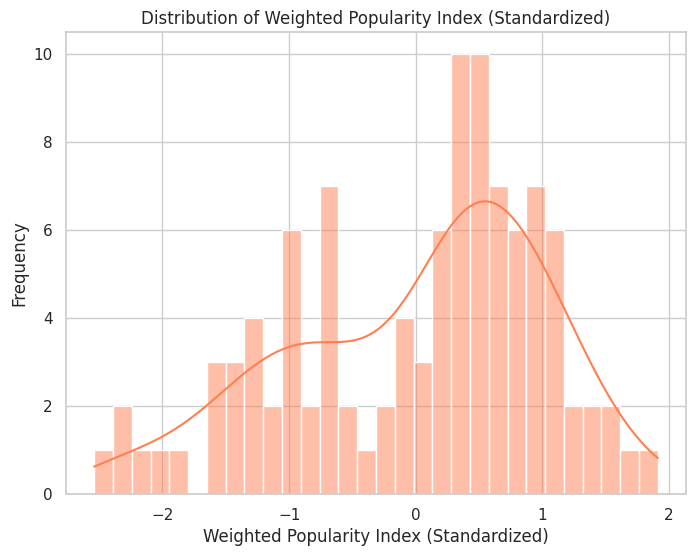


### OLS Regression Results with Weighted Popularity Index ###

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     17.87
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           6.11e-05
Time:                        18:47:38   Log-Likelihood:                 18.363
No. Observations:                  84   AIC:                            -32.73
Df Residuals:                      82   BIC:                            -27.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

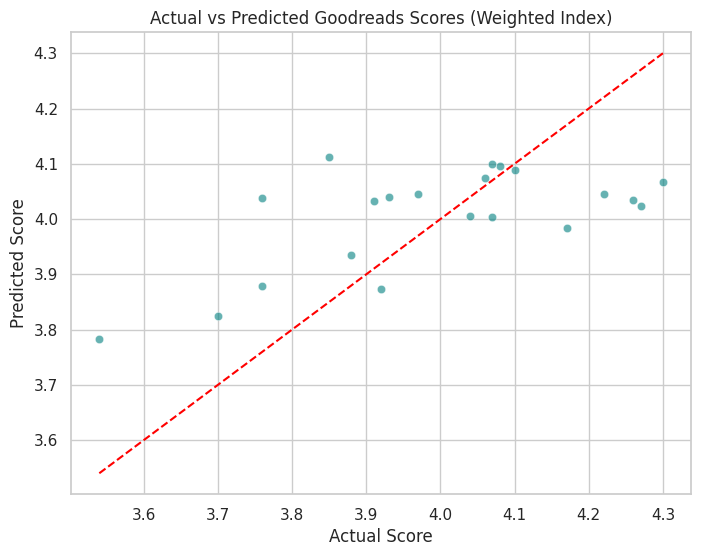

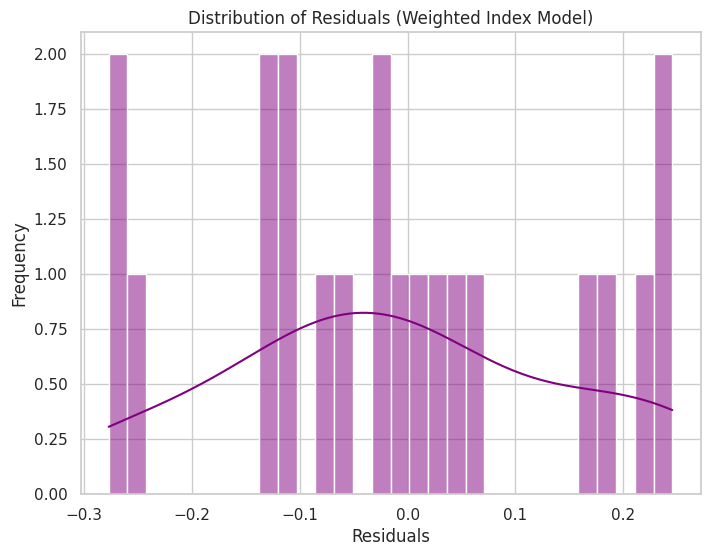

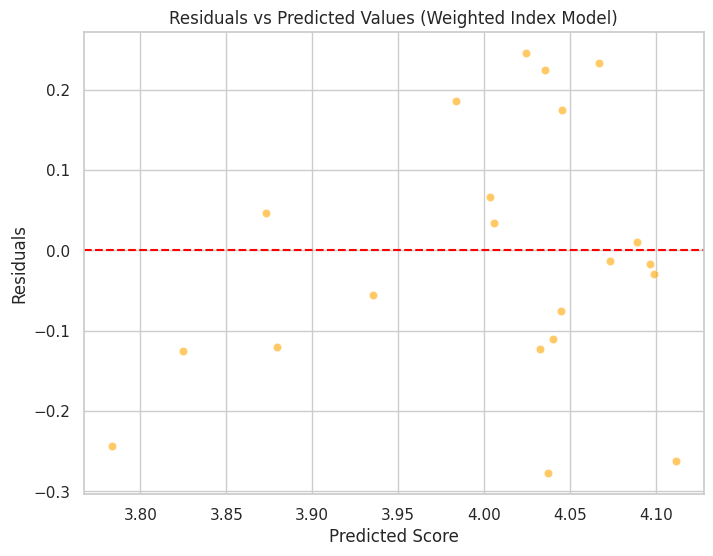


### Summary of Weighted Popularity Index Model Performance ###

Weighted Index Model Training R²: 0.1789
Weighted Index Model Test MSE: 0.0243
Weighted Index Model Adjusted R²: 0.1689


### Interpretation of Weighted Popularity Index Results ###

- **Adjusted R² Comparison:**
  - Reduced Model: 0.1903
  - PCA-Based Index Model: 0.1292
  - Weighted Index Model: 0.1689

- **Performance Insights:**
  - The Weighted Popularity Index outperforms the PCA-Based Index Model in explaining variance in Goodreads Scores.
  - Compared to the Reduced Model, the Weighted Index Model achieves a lower Adjusted R², indicating that the Reduced Model retains more predictive power.

- **Conclusion:**
  - While the Weighted Popularity Index offers a more interpretable combination of popularity metrics based on their regression-derived importance, it does not surpass the Reduced Model in predictive performance. This suggests that individual metrics hold unique predictive information that is partially lost w

In [16]:
# ### 9. Creating a Weighted Popularity Index Based on Regression Coefficients ###

# #### 9.1. Fitting a Multiple OLS Regression Model with Individual Predictors ####

# Define the final set of independent variables (excluding Log_ReviewsCount)
indep_vars_final = ['Log_RatingsCount', 'Log_Popularity_ReadingNow', 'Log_Popularity_Wishlisted']

# Prepare the design matrix by adding a constant
X_final = df_goodreads[indep_vars_final]
X_final = sm.add_constant(X_final)
y_final = df_goodreads[dependent_var]

# Fit the OLS regression model
model_individual = sm.OLS(y_final, X_final).fit()

# Display the regression summary
print("\n### OLS Regression Results with Individual Predictors ###\n")
print(model_individual.summary())

# #### 9.2. Extracting Regression Coefficients ####

# Extract coefficients (excluding the intercept)
coefficients = model_individual.params.drop('const')
print("\n### Regression Coefficients for Weighted Popularity Index ###\n")
print(coefficients)

# #### 9.3. Creating the Weighted Popularity Index ####

# Calculate the weighted sum of the independent variables using the regression coefficients
# Note: It's common to exclude the intercept from the index
df_goodreads['Weighted_Popularity_Index'] = (
    coefficients['Log_RatingsCount'] * df_goodreads['Log_RatingsCount'] +
    coefficients['Log_Popularity_ReadingNow'] * df_goodreads['Log_Popularity_ReadingNow'] +
    coefficients['Log_Popularity_Wishlisted'] * df_goodreads['Log_Popularity_Wishlisted']
)

# Display the first few rows to verify the creation of the index
print("\n### Weighted Popularity Index ###\n")
print(df_goodreads[['Weighted_Popularity_Index']].head())

# #### 9.4. Standardizing the Weighted Popularity Index ####

# Standardize the Weighted Popularity Index for consistency
scaler_weighted = StandardScaler()
df_goodreads['Weighted_Popularity_Index_Standardized'] = scaler_weighted.fit_transform(
    df_goodreads[['Weighted_Popularity_Index']]
)

# Display the first few rows to verify standardization
print("\n### Standardized Weighted Popularity Index ###\n")
print(df_goodreads[['Weighted_Popularity_Index_Standardized']].head())

# #### 9.5. Visualizing the Weighted Popularity Index ####

# Plot the distribution of the Weighted Popularity Index
plt.figure(figsize=(8, 6))
sns.histplot(df_goodreads['Weighted_Popularity_Index_Standardized'], bins=30, kde=True, color='coral')
plt.title('Distribution of Weighted Popularity Index (Standardized)')
plt.xlabel('Weighted Popularity Index (Standardized)')
plt.ylabel('Frequency')
plt.show()

# #### 9.6. Validating the Weighted Popularity Index Through Regression Modeling ####

# ##### 9.6.1. Splitting the Data into Training and Testing Sets #####

# Define the predictor and target for the weighted index model
X_weighted = df_goodreads[['Weighted_Popularity_Index_Standardized']]
y_weighted = df_goodreads['Score']

# Split the data into training and testing sets
X_train_weighted, X_test_weighted, y_train_weighted, y_test_weighted = train_test_split(
    X_weighted, y_weighted, test_size=0.2, random_state=42
)

# ##### 9.6.2. Adding a Constant to the Predictor for OLS #####

# Add a constant term for the intercept in the training and testing sets
X_train_weighted_const = sm.add_constant(X_train_weighted)
X_test_weighted_const = sm.add_constant(X_test_weighted)

# ##### 9.6.3. Fitting OLS Regression with the Weighted Popularity Index #####

# Fit the OLS model on the training data
model_weighted = sm.OLS(y_train_weighted, X_train_weighted_const).fit()

# Display the regression summary
print("\n### OLS Regression Results with Weighted Popularity Index ###\n")
print(model_weighted.summary())

# ##### 9.6.4. Predicting and Evaluating the Weighted Index Model #####

# Predict on the test set
y_pred_weighted = model_weighted.predict(X_test_weighted_const)

# Calculate Mean Squared Error (MSE) and R-squared for the weighted model
mse_weighted = mean_squared_error(y_test_weighted, y_pred_weighted)
r2_weighted = model_weighted.rsquared

print(f"\n### Weighted Popularity Index - Test MSE: {mse_weighted:.4f} ###")
print(f"### Weighted Popularity Index - Training R²: {r2_weighted:.4f} ###\n")

# ##### 9.6.5. Comparing with PCA-Based and Reduced Models #####

# Extract Adjusted R-squared values for comparison
adjusted_r2_reduced = model_reduced.rsquared_adj
adjusted_r2_pca = model_pca.rsquared_adj
adjusted_r2_weighted = model_weighted.rsquared_adj

print("\n### Comparison of Adjusted R² Across Models ###\n")
print(f"Reduced Model Adjusted R²: {adjusted_r2_reduced:.4f}")
print(f"PCA-Based Index Model Adjusted R²: {adjusted_r2_pca:.4f}")
print(f"Weighted Index Model Adjusted R²: {adjusted_r2_weighted:.4f}\n")

# ##### 9.6.6. Visualizing Actual vs Predicted Scores for Weighted Index #####

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_weighted, y=y_pred_weighted, alpha=0.6, color='teal')
sns.lineplot(x=y_test_weighted, y=y_test_weighted, color='red', linestyle='--')  # Perfect prediction line
plt.title('Actual vs Predicted Goodreads Scores (Weighted Index)')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

# ##### 9.6.7. Residual Analysis for Weighted Index Model #####

# Calculate residuals
residuals_weighted = y_test_weighted - y_pred_weighted

# Plot residuals distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals_weighted, bins=30, kde=True, color='purple')
plt.title('Distribution of Residuals (Weighted Index Model)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_weighted, y=residuals_weighted, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Weighted Index Model)')
plt.xlabel('Predicted Score')
plt.ylabel('Residuals')
plt.show()

# #### 9.7. Summary of Weighted Popularity Index Model Performance ####

print("\n### Summary of Weighted Popularity Index Model Performance ###\n")
print(f"Weighted Index Model Training R²: {r2_weighted:.4f}")
print(f"Weighted Index Model Test MSE: {mse_weighted:.4f}")
print(f"Weighted Index Model Adjusted R²: {model_weighted.rsquared_adj:.4f}\n")

# #### 9.8. Comparison and Interpretation ####

print("\n### Interpretation of Weighted Popularity Index Results ###\n")
print(f"- **Adjusted R² Comparison:**")
print(f"  - Reduced Model: {adjusted_r2_reduced:.4f}")
print(f"  - PCA-Based Index Model: {adjusted_r2_pca:.4f}")
print(f"  - Weighted Index Model: {adjusted_r2_weighted:.4f}")
print("\n- **Performance Insights:**")
if adjusted_r2_weighted > adjusted_r2_pca:
    print("  - The Weighted Popularity Index outperforms the PCA-Based Index Model in explaining variance in Goodreads Scores.")
else:
    print("  - The Weighted Popularity Index does not outperform the PCA-Based Index Model in explaining variance in Goodreads Scores.")
print(f"  - Compared to the Reduced Model, the Weighted Index Model achieves a lower Adjusted R², indicating that the Reduced Model retains more predictive power.")

# Performing Additional Analysis to Explore Bias Due to Ratings Count in the Dataset

In [ ]:
# Check if 'C' exists in the local namespace
if 'C' in locals():
    print("Variable 'C' exists in the local namespace.")

# Check if 'C' exists in the global namespace
if 'C' in globals():
    print("Variable 'C' exists in the global namespace.")

# Remove 'C' from the local namespace if it exists
if 'C' in locals():
    del C
    print("Variable 'C' has been deleted from the local namespace.")

# Remove 'C' from the global namespace if it exists
if 'C' in globals():
    del C
    print("Variable 'C' has been deleted from the global namespace.")

# Confirm that 'C' has been removed
if 'C' not in locals() and 'C' not in globals():
    print("Variable 'C' no longer exists in the namespace.")
else:
    print("Variable 'C' still exists. Please ensure it is removed.")

In [ ]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg

# Ensure plots are rendered inline
%matplotlib inline

# =============================
# 1. Data Preparation
# =============================

# Assuming df_goodreads is already loaded and multicollinearity has been addressed

# Display Columns to Confirm 'RatingsCount_Group' Existence
print("Columns in DataFrame:", df_goodreads.columns.tolist())

# Display First Few Rows to Inspect 'RatingsCount_Group'
print("\nFirst 5 Rows of DataFrame:")
print(df_goodreads.head())

# =============================
# 2. Categorizing RatingsCount
# =============================

# Define Quartiles
Q1 = df_goodreads['RatingsCount'].quantile(0.25)
Q3 = df_goodreads['RatingsCount'].quantile(0.75)

print(f"\nQ1 (25th percentile) of RatingsCount: {Q1}")
print(f"Q3 (75th percentile) of RatingsCount: {Q3}")

# Categorize RatingsCount into 'Low', 'Medium', 'High' based on quartiles
df_goodreads['RatingsCount_Group'] = pd.cut(
    df_goodreads['RatingsCount'],
    bins=[-np.inf, Q1, Q3, np.inf],
    labels=['Low', 'Medium', 'High']
)

# Verify the New Column
print("\nSample of 'RatingsCount' and 'RatingsCount_Group':")
print(df_goodreads[['RatingsCount', 'RatingsCount_Group']].head())

# Display Counts of Each Group
print("\nCounts of 'RatingsCount_Group':")
print(df_goodreads['RatingsCount_Group'].value_counts())

# =============================
# 3. Data Cleaning
# =============================

# Ensure 'RatingsCount' is Numeric and Handle Missing Values
df_goodreads['RatingsCount'] = pd.to_numeric(df_goodreads['RatingsCount'], errors='coerce')

# Drop Rows with Missing 'RatingsCount' or 'Score' if Necessary
df_goodreads = df_goodreads.dropna(subset=['RatingsCount', 'Score'])

# Verify DataFrame after Cleaning
print("\nDataFrame Columns After Cleaning:", df_goodreads.columns.tolist())
print("\nFirst 5 Rows After Cleaning:")
print(df_goodreads[['RatingsCount', 'RatingsCount_Group', 'Score']].head())

# =============================
# 4. Visualizing RatingsCount Groups
# =============================

# Boxplot to Visualize Score Distribution Across RatingsCount Groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='RatingsCount_Group', y='Score', data=df_goodreads, palette='Set2')
plt.title('Distribution of Scores Across RatingsCount Groups')
plt.xlabel('Ratings Count Group')
plt.ylabel('Score')
plt.show()

# =============================
# 5. Levene's Test for Homogeneity of Variances
# =============================

# Extract Scores for Each Group
scores_low = df_goodreads[df_goodreads['RatingsCount_Group'] == 'Low']['Score']
scores_medium = df_goodreads[df_goodreads['RatingsCount_Group'] == 'Medium']['Score']
scores_high = df_goodreads[df_goodreads['RatingsCount_Group'] == 'High']['Score']

# Perform Levene's Test (Using Median as the Center for Robustness)
levene_stat, levene_p = levene(scores_low, scores_medium, scores_high, center='median')

print(f"\nLevene's Test for Homogeneity of Variances:")
print(f"Statistic: {levene_stat:.4f}, P-value: {levene_p:.4f}")

# Interpretation
if levene_p < 0.05:
    print("Result: Significant difference in variances across groups (Reject H0).")
else:
    print("Result: No significant difference in variances across groups (Fail to Reject H0).")

# =============================
# 6. Welch's ANOVA
# =============================

# Define the OLS Model with Categorical Predictor
model = ols('Score ~ C(RatingsCount_Group)', data=df_goodreads).fit()

# Perform Welch's ANOVA
anova_table = sm.stats.anova_lm(model, typ=2, robust='hc3')

print("\n### Welch's ANOVA Results ###\n")
print(anova_table)

# Interpretation
if anova_table['PR(>F)'][0] < 0.05:
    print("\nConclusion: Significant differences in scores across RatingsCount groups.")
else:
    print("\nConclusion: No significant differences in scores across RatingsCount groups.")

# =============================
# 7. Post-hoc Analysis with Games-Howell Test
# =============================

# Perform Games-Howell post-hoc test using Pingouin
posthoc = pg.pairwise_gameshowell(dv='Score', between='RatingsCount_Group', data=df_goodreads)

# Display the post-hoc test results
print("\n### Games-Howell Post-hoc Test Results ###\n")
print(posthoc)

# Display the columns of the posthoc DataFrame
print("\nColumns in the Post-hoc Results:")
print(posthoc.columns.tolist())

# Define possible p-value column names
possible_p_cols = ['p-unc', 'p-corr', 'pval']

# Find the correct p-value column
p_col = None
for col in possible_p_cols:
    if col in posthoc.columns:
        p_col = col
        break

if p_col is None:
    print("\nError: P-value column not found in the post-hoc results.")
else:
    # Interpretation of Results
    print("\nPost-hoc Comparisons:")
    for index, row in posthoc.iterrows():
        group1 = row['A']
        group2 = row['B']
        p_val = row[p_col]
        significant = 'Yes' if p_val < 0.05 else 'No'
        print(f"{group1} vs {group2}: p-value = {p_val:.4f} (Significant: {significant})")

# =============================
# 8. Cleaning Up the Environment
# =============================

# Remove Variable 'C' if It Exists (Avoid Potential Conflicts)
if 'C' in locals():
    del C
    print("\nVariable 'C' has been deleted from the local namespace.")

if 'C' in globals():
    del C
    print("Variable 'C' has been deleted from the global namespace.")

if 'C' not in locals() and 'C' not in globals():
    print("Variable 'C' no longer exists in the namespace.")
else:
    print("Variable 'C' still exists. Please ensure it is removed.")


# FIXED Score Adjustment

In [ ]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, friedmanchisquare
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

import pingouin as pg
from bayes_opt import BayesianOptimization

import warnings
warnings.filterwarnings('ignore')

# Ensure plots are rendered inline (if using Jupyter Notebook or Colab)
%matplotlib inline

# 1. Load the dataset
try:
    df_goodreads = pd.read_csv('/content/drive/MyDrive/cleaned_goodreads_dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'cleaned_goodreads_dataset.csv' was not found. Please check the file path.")
    raise

# Display the first few rows
print("\nInitial DataFrame:")
print(df_goodreads.head())

# Display data types
print("\nData Types of Each Column:")
print(df_goodreads.dtypes)

# Check for missing values
print("\nMissing Values in Each Column:")
print(df_goodreads.isnull().sum())

# 2. Data Cleaning and Preprocessing
# Drop rows with missing values in critical columns
critical_columns = ['Score', 'RatingsCount', 'ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted', 'PublishedDate']
df_goodreads = df_goodreads.dropna(subset=critical_columns)
print("\nDataFrame after dropping missing values in critical columns:")
print(df_goodreads.shape)

# Convert 'PublishedDate' to datetime
df_goodreads['PublishedDate'] = pd.to_datetime(df_goodreads['PublishedDate'], errors='coerce')

# Check for any conversion issues
invalid_dates = df_goodreads[df_goodreads['PublishedDate'].isnull()]
print("\nRows with Invalid 'PublishedDate':")
print(invalid_dates.head())

# Drop rows with invalid 'PublishedDate'
df_goodreads = df_goodreads.dropna(subset=['PublishedDate'])
print("\nDataFrame after dropping rows with invalid 'PublishedDate':")
print(df_goodreads.shape)

# Verify data types after conversion
print("\nData Types After Conversion:")
print(df_goodreads.dtypes)

# 3. Feature Transformation and Outlier Handling
# Apply logarithmic transformation using log1p to handle zero values
df_goodreads['Log_RatingsCount'] = np.log1p(df_goodreads['RatingsCount'])
df_goodreads['Log_ReviewsCount'] = np.log1p(df_goodreads['ReviewsCount'])
df_goodreads['Log_Popularity_ReadingNow'] = np.log1p(df_goodreads['Popularity_ReadingNow'])
df_goodreads['Log_Popularity_Wishlisted'] = np.log1p(df_goodreads['Popularity_Wishlisted'])

# Verify transformations
print("\nDescriptive Statistics After Log Transformation:")
print(df_goodreads[['Log_RatingsCount', 'Log_ReviewsCount',
                   'Log_Popularity_ReadingNow', 'Log_Popularity_Wishlisted']].describe())

# Handle outliers using Winsorization on RatingsCount using pandas' clip
def cap_outliers_pandas(series, lower_quantile=0.01, upper_quantile=0.99):
    """
    Cap the outliers in a series based on specified quantiles using pandas' clip.

    Parameters:
    - series (pd.Series): The data series to cap.
    - lower_quantile (float): Lower quantile for capping.
    - upper_quantile (float): Upper quantile for capping.

    Returns:
    - pd.Series: The capped data series.
    """
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return series.clip(lower, upper)

# Apply capping to 'RatingsCount'
df_goodreads['RatingsCount_Capped'] = cap_outliers_pandas(df_goodreads['RatingsCount'], lower_quantile=0.01, upper_quantile=0.99)

# Recalculate log-transformed RatingsCount after capping
df_goodreads['Log_RatingsCount_Capped'] = np.log1p(df_goodreads['RatingsCount_Capped'])

# Verify capping
print("\nDescriptive Statistics After Capping RatingsCount:")
print(df_goodreads[['RatingsCount', 'RatingsCount_Capped', 'Log_RatingsCount_Capped']].describe())

# 4. Define Bias Mitigation Methods
# Overall mean score
mu = df_goodreads['Score'].mean()
print(f"\nOverall Mean Score (mu): {mu:.4f}")

# Define Laplace Smoothing
def laplace_smoothing(score, ratings, k, mu):
    """
    Apply Laplace Smoothing to the score.

    Parameters:
    - score (float): Original score of the book.
    - ratings (int): Number of ratings the book has received.
    - k (float): Smoothing parameter.
    - mu (float): Overall mean score.

    Returns:
    - float: Smoothed score.
    """
    if ratings == 0:
        return mu  # Assign mean score if no ratings
    return (score * ratings + k * mu) / (ratings + k)

# Define Wilson Score Interval Adjustment
def calculate_wilson_score_adjusted(score, ratings, mu, confidence=0.95):
    """
    Calculate the adjusted score using the Wilson Score Interval.

    Parameters:
    - score (float): Original score of the book (1 to 5 scale).
    - ratings (int): Number of ratings the book has received.
    - mu (float): Overall mean score across all books.
    - confidence (float): Confidence level for the interval.

    Returns:
    - float: Adjusted score.
    """
    if ratings == 0:
        return mu  # Assign mean score if no ratings

    # Convert score to proportion (0 to 1)
    p = (score - 1) / 4

    # Calculate z-score based on confidence level
    z = norm.ppf(1 - (1 - confidence) / 2)

    # Wilson Score Interval Lower Bound
    denominator = 1 + (z**2) / ratings
    center = (p + (z**2) / (2 * ratings)) / denominator
    margin = (z * np.sqrt((p * (1 - p) + (z**2) / (4 * ratings)) / ratings)) / denominator
    lower_bound = (center - margin) * 4 + 1  # Convert back to score scale

    # Wilson Score Interval Upper Bound
    upper_bound = (center + margin) * 4 + 1

    # Determine adjustment direction
    if score > mu:
        # Adjust downward towards the mean using the lower bound
        adjustment = min(score - lower_bound, score - mu)  # Ensure adjustment doesn't overshoot
        adjusted_score = score - adjustment
    elif score < mu:
        # Adjust upward towards the mean using the upper bound
        adjustment = min(upper_bound - score, mu - score)
        adjusted_score = score + adjustment
    else:
        # Score is equal to the mean; no adjustment needed
        adjusted_score = score

    # Ensure the adjusted score is within [1,5]
    adjusted_score = max(1, min(5, adjusted_score))

    return adjusted_score

# Define Ridge Regression Adjustment
def calculate_ridge_regression_adjusted_scores(df, alpha=1.0, n_components=2, cv_folds=5):
    """
    Calculate adjusted scores using Ridge Regression with PCA and Cross-Validation.

    Parameters:
    - df (DataFrame): The input DataFrame containing predictor variables and the target variable.
    - alpha (float): Regularization strength for Ridge Regression.
    - n_components (int): Number of principal components for PCA.
    - cv_folds (int): Number of cross-validation folds.

    Returns:
    - np.array: Adjusted scores predicted by the Ridge Regression model.
    """
    predictors = ['Log_RatingsCount_Capped', 'Log_ReviewsCount',
                  'Log_Popularity_ReadingNow', 'Log_Popularity_Wishlisted']
    X = df[predictors]
    y = df['Score']

    pipeline = Pipeline([
        ('pca', PCA(n_components=n_components)),
        ('ridge', Ridge(alpha=alpha))
    ])

    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    adjusted_scores = cross_val_predict(pipeline, X, y, cv=kf)

    return adjusted_scores

# Define Bayesian Average
def calculate_bayesian_average(score, ratings, C, m):
    """
    Calculate the Bayesian Average score for a book.

    Parameters:
    - score (float): Original score of the book.
    - ratings (int): Number of ratings the book has received.
    - C (float): Overall mean score across all books.
    - m (float): Minimum number of ratings required to be considered reliable.

    Returns:
    - float: Adjusted Bayesian Average score.
    """
    return (C * m + score * ratings) / (m + ratings)

def apply_bayesian_average(df, C, m):
    """
    Apply Bayesian Average Adjustment to the DataFrame.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - C (float): Overall mean score.
    - m (float): Minimum number of ratings.

    Returns:
    - DataFrame: DataFrame with adjusted Bayesian Average scores.
    """
    df['Adjusted_Score_Bayesian'] = df.apply(
        lambda row: calculate_bayesian_average(row['Score'], row['RatingsCount'], C, m),
        axis=1
    )
    return df

# 5. Apply Bias Mitigation Methods
# Apply Ridge Regression Adjustment with PCA
df_goodreads['Adjusted_Score_Ridge'] = calculate_ridge_regression_adjusted_scores(
    df_goodreads,
    alpha=1.0,
    n_components=2,
    cv_folds=5
)

# Apply Bayesian Average Adjustment
m = df_goodreads['RatingsCount'].median()
df_goodreads = apply_bayesian_average(df_goodreads, C=mu, m=m)

# Apply Laplace Smoothing with default k=1.0 (to be optimized later)
default_k = 1.0
df_goodreads['Adjusted_Score_Laplace'] = df_goodreads.apply(
    lambda row: laplace_smoothing(
        score=row['Score'],
        ratings=row['RatingsCount_Capped'],
        k=default_k,
        mu=mu
    ),
    axis=1
)

# Apply Wilson Score Interval with default z=1.96 (95% confidence)
default_z = 1.96
df_goodreads['Adjusted_Score_Wilson'] = df_goodreads.apply(
    lambda row: calculate_wilson_score_adjusted(
        score=row['Score'],
        ratings=row['RatingsCount_Capped'],
        mu=mu,
        confidence=0.95
    ),
    axis=1
)

# Display sample adjusted scores
print("\nSample Adjusted Scores using Ridge Regression, Bayesian Average, Laplace Smoothing, and Wilson Score Interval:")
print(df_goodreads[['Score', 'Adjusted_Score_Ridge', 'Adjusted_Score_Bayesian', 'Adjusted_Score_Laplace', 'Adjusted_Score_Wilson']].head())

# 6. Define Effectiveness Metrics Functions
def calculate_effectiveness_metric_directional(original_scores, adjusted_scores, mu):
    """
    Calculate the directional effectiveness metric.

    Parameters:
    - original_scores (pd.Series): Original book scores.
    - adjusted_scores (pd.Series): Adjusted book scores.
    - mu (float): Overall mean score.

    Returns:
    - pd.Series: Effectiveness scores for each observation.
    """
    denominator = np.abs(original_scores - mu).replace(0, 1e-6)
    effectiveness = 1 - (np.abs(adjusted_scores - mu) / denominator)
    return effectiveness

def calculate_mae(original_scores, adjusted_scores):
    """
    Calculate Mean Absolute Error (MAE).

    Parameters:
    - original_scores (pd.Series): Original scores.
    - adjusted_scores (pd.Series): Adjusted scores.

    Returns:
    - float: MAE value.
    """
    return mean_absolute_error(original_scores, adjusted_scores)

def calculate_variance_reduction(original_scores, adjusted_scores):
    """
    Calculate Variance Reduction.

    Parameters:
    - original_scores (pd.Series): Original scores.
    - adjusted_scores (pd.Series): Adjusted scores.

    Returns:
    - float: Variance reduction ratio.
    """
    original_variance = original_scores.var()
    adjusted_variance = adjusted_scores.var()
    return 1 - (adjusted_variance / original_variance)

def calculate_correlation_difference(original_scores, adjusted_scores, ratings_count):
    """
    Calculate the difference in correlation between scores and RatingsCount.

    Parameters:
    - original_scores (pd.Series): Original scores.
    - adjusted_scores (pd.Series): Adjusted scores.
    - ratings_count (pd.Series): Ratings count.

    Returns:
    - float: Difference in correlation coefficients.
    """
    original_corr = original_scores.corr(ratings_count)
    adjusted_corr = adjusted_scores.corr(ratings_count)
    return original_corr - adjusted_corr

def calculate_all_effectiveness_metrics(df, adjusted_columns, mu):
    """
    Calculate multiple effectiveness metrics for each bias mitigation method.

    Parameters:
    - df (DataFrame): The input DataFrame containing original and adjusted scores.
    - adjusted_columns (dict): Dictionary mapping method names to adjusted score column names.
    - mu (float): Overall mean score.

    Returns:
    - pd.DataFrame: DataFrame containing all effectiveness metrics.
    """
    metrics = []
    for method, column in adjusted_columns.items():
        effectiveness = calculate_effectiveness_metric_directional(df['Score'], df[column], mu)
        mae = calculate_mae(df['Score'], df[column])
        variance_reduction = calculate_variance_reduction(df['Score'], df[column])
        correlation_diff = calculate_correlation_difference(df['Score'], df[column], df['RatingsCount'])

        metrics.append({
            'Method': method,
            'Median Absolute Error': np.median(np.abs(df['Score'] - df[column])),
            'Percentage Moved Towards Mean': (
                ((df['Score'] > mu) & (df[column] < df['Score'])) |
                ((df['Score'] < mu) & (df[column] > df['Score']))
            ).mean(),
            'Effectiveness': effectiveness.mean(),
            'MAE': mae,
            'Variance Reduction': variance_reduction,
            'Correlation Difference': correlation_diff
        })
    return pd.DataFrame(metrics)

# 7. Calculate All Effectiveness Metrics
# Define adjusted score columns for effectiveness metrics
adjusted_columns = {
    'Wilson Adjusted': 'Adjusted_Score_Wilson',
    'Ridge Regression': 'Adjusted_Score_Ridge',
    'Bayesian Average': 'Adjusted_Score_Bayesian',
    'Laplace Smoothing': 'Adjusted_Score_Laplace'
}

# Calculate all effectiveness metrics
df_total_metrics = calculate_all_effectiveness_metrics(
    df_goodreads,
    adjusted_columns=adjusted_columns,
    mu=mu
)

# Display the effectiveness metrics
print("\nEffectiveness Metrics for Each Bias Mitigation Method:")
print(df_total_metrics)

# 8. Optimize Parameters Using Bayesian Optimization
# Define Laplace Smoothing Objective Function
def objective_laplace(k, df, mu):
    """
    Objective function for Laplace Smoothing Bayesian Optimization.

    Parameters:
    - k (float): Smoothing parameter.
    - df (DataFrame): Input DataFrame.
    - mu (float): Overall mean score.

    Returns:
    - float: Negative combined effectiveness (to be maximized).
    """
    adjusted_scores = df.apply(
        lambda row: laplace_smoothing(
            score=row['Score'],
            ratings=row['RatingsCount_Capped'],
            k=k,
            mu=mu
        ),
        axis=1
    )
    effectiveness = calculate_effectiveness_metric_directional(df['Score'], adjusted_scores, mu).mean()
    return -effectiveness

# Optimize Laplace Smoothing
def optimize_laplace(df, mu):
    """
    Optimize the smoothing parameter 'k' for Laplace Smoothing using Bayesian Optimization.

    Parameters:
    - df (DataFrame): Input DataFrame.
    - mu (float): Overall mean score.

    Returns:
    - float: Optimal 'k' value.
    """
    optimizer = BayesianOptimization(
        f=lambda k: objective_laplace(k, df, mu),
        pbounds={'k': (0.1, 5.0)},
        random_state=42,
        verbose=0
    )

    optimizer.maximize(
        init_points=10,
        n_iter=30,
    )

    optimal_k = optimizer.max['params']['k']
    optimal_effectiveness = -optimizer.max['target']

    print(f"\nOptimal k for Laplace Smoothing: {optimal_k:.4f}")
    print(f"Corresponding Combined Effectiveness: {optimal_effectiveness:.4f}")

    return optimal_k

# Define Wilson Score Interval Objective Function
def objective_wilson(z, df, mu):
    """
    Objective function for Wilson Score Interval Bayesian Optimization.

    Parameters:
    - z (float): Z-score corresponding to the desired confidence level.
    - df (DataFrame): Input DataFrame.
    - mu (float): Overall mean score.

    Returns:
    - float: Negative combined effectiveness (to be maximized).
    """
    adjusted_scores = df.apply(
        lambda row: calculate_wilson_score_adjusted(
            score=row['Score'],
            ratings=row['RatingsCount_Capped'],
            mu=mu,
            confidence=0.95
        ),
        axis=1
    )
    effectiveness = calculate_effectiveness_metric_directional(df['Score'], adjusted_scores, mu).mean()
    return -effectiveness

# Optimize Wilson Score Interval
def optimize_wilson(df, mu):
    """
    Optimize the z-score parameter for Wilson Score Interval using Bayesian Optimization.

    Parameters:
    - df (DataFrame): Input DataFrame.
    - mu (float): Overall mean score.

    Returns:
    - float: Optimal z-score value.
    """
    optimizer = BayesianOptimization(
        f=lambda z: objective_wilson(z, df, mu),
        pbounds={'z': (1.0, 3.0)},
        random_state=42,
        verbose=0
    )

    optimizer.maximize(
        init_points=10,
        n_iter=30,
    )

    optimal_z = optimizer.max['params']['z']
    optimal_effectiveness = -optimizer.max['target']

    print(f"\nOptimal z for Wilson Score Interval: {optimal_z:.4f}")
    print(f"Corresponding Combined Effectiveness: {optimal_effectiveness:.4f}")

    return optimal_z

# Perform Optimization
optimal_laplace_k = optimize_laplace(df_goodreads, mu)
optimal_wilson_z = optimize_wilson(df_goodreads, mu)

# 9. Recalculate Adjusted Scores with Optimized Parameters
# Apply Laplace Smoothing with optimal k
df_goodreads['Adjusted_Score_Laplace_Optimized'] = df_goodreads.apply(
    lambda row: laplace_smoothing(
        score=row['Score'],
        ratings=row['RatingsCount_Capped'],
        k=optimal_laplace_k,
        mu=mu
    ),
    axis=1
)

# Define optimized Wilson Score Interval Adjustment
def calculate_wilson_score_adjusted_optimized(score, ratings, mu, z):
    """
    Calculate the adjusted score using the optimized Wilson Score Interval.

    Parameters:
    - score (float): Original score of the book (1 to 5 scale).
    - ratings (int): Number of ratings the book has received.
    - mu (float): Overall mean score across all books.
    - z (float): Optimized z-score for confidence interval.

    Returns:
    - float: Adjusted score.
    """
    if ratings == 0:
        return mu

    p = (score - 1) / 4
    denominator = 1 + (z**2) / ratings
    center = (p + (z**2) / (2 * ratings)) / denominator
    margin = (z * np.sqrt((p * (1 - p) + (z**2) / (4 * ratings)) / ratings)) / denominator
    lower_bound = (center - margin) * 4 + 1
    upper_bound = (center + margin) * 4 + 1

    if score > mu:
        adjustment = min(score - lower_bound, score - mu)
        adjusted_score = score - adjustment
    elif score < mu:
        adjustment = min(upper_bound - score, mu - score)
        adjusted_score = score + adjustment
    else:
        adjusted_score = score

    adjusted_score = max(1, min(5, adjusted_score))
    return adjusted_score

# Apply Wilson Score Interval with optimized z
df_goodreads['Adjusted_Score_Wilson_Optimized'] = df_goodreads.apply(
    lambda row: calculate_wilson_score_adjusted_optimized(
        score=row['Score'],
        ratings=row['RatingsCount_Capped'],
        mu=mu,
        z=optimal_wilson_z
    ),
    axis=1
)

# Display sample adjusted scores after optimization
print("\nSample Adjusted Scores using Optimized Laplace Smoothing and Wilson Score Interval:")
print(df_goodreads[['Score', 'Adjusted_Score_Laplace_Optimized', 'Adjusted_Score_Wilson_Optimized']].head())

# Update adjusted_columns dictionary to include optimized methods
adjusted_columns_optimized = {
    'Wilson Adjusted': 'Adjusted_Score_Wilson',
    'Ridge Regression': 'Adjusted_Score_Ridge',
    'Bayesian Average': 'Adjusted_Score_Bayesian',
    'Laplace Smoothing': 'Adjusted_Score_Laplace',
    'Laplace Smoothing Optimized': 'Adjusted_Score_Laplace_Optimized',
    'Wilson Adjusted Optimized': 'Adjusted_Score_Wilson_Optimized'
}

# 10. Calculate All Effectiveness Metrics Including Optimized Methods
df_total_metrics_optimized = calculate_all_effectiveness_metrics(
    df_goodreads,
    adjusted_columns=adjusted_columns_optimized,
    mu=mu
)

# Display the effectiveness metrics
print("\nEffectiveness Metrics for Each Bias Mitigation Method:")
print(df_total_metrics_optimized)

# 11. Compute Error Metrics
def calculate_error_metrics(df, original, adjusted, method_name):
    """
    Calculate MAE and RMSE between original and adjusted scores.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - original (str): Column name for original scores.
    - adjusted (str): Column name for adjusted scores.
    - method_name (str): Name of the bias mitigation method.

    Returns:
    - dict: Dictionary containing MAE and RMSE.
    """
    mae = mean_absolute_error(df[original], df[adjusted])
    rmse = np.sqrt(mean_squared_error(df[original], df[adjusted]))
    return {'Method': method_name, 'MAE': mae, 'RMSE': rmse}

# Calculate MAE and RMSE for each method
error_metrics = []

for method, column in adjusted_columns_optimized.items():
    error_metrics.append(calculate_error_metrics(
        df_goodreads, 'Score', column, method
    ))

# Create a DataFrame for error metrics
df_error_metrics = pd.DataFrame(error_metrics)

print("\nError Metrics (MAE and RMSE) for Each Bias Mitigation Method:")
print(df_error_metrics)

# 12. Statistical Testing
# Prepare data for Friedman Test using actual column names
methods_for_test = ['Adjusted_Score_Wilson', 'Adjusted_Score_Ridge', 'Adjusted_Score_Bayesian',
                   'Adjusted_Score_Laplace', 'Adjusted_Score_Laplace_Optimized', 'Adjusted_Score_Wilson_Optimized']
data_friedman = df_goodreads[methods_for_test].dropna()

# Check if all methods are present in the DataFrame
missing_methods = set(methods_for_test) - set(data_friedman.columns)
if missing_methods:
    print(f"\nError: The following methods are missing from the DataFrame columns: {missing_methods}")
else:
    # Perform Friedman Test
    friedman_stat, friedman_p = friedmanchisquare(
        *[data_friedman[method] for method in methods_for_test]
    )

    print(f"\nFriedman Test: Chi-Square = {friedman_stat:.4f}, p-value = {friedman_p:.4f}")

    if friedman_p < 0.05:
        print("Result: Significant differences found between methods.")

        # Melt the DataFrame for Dunn's Post-Hoc Test
        df_melted_effectiveness = data_friedman.reset_index().melt(
            id_vars='index',
            value_vars=methods_for_test,
            var_name='Adjustment_Method',
            value_name='Effectiveness'
        )

        # Perform Dunn's Post-Hoc Test with Bonferroni correction
        posthoc = pg.pairwise_tests(
            data=df_melted_effectiveness,
            dv='Effectiveness',
            within='Adjustment_Method',
            subject='index',
            padjust='bonferroni',
            effsize='none',
            parametric=False,
            alternative='two-sided'
        )

        print("\nDunn's Post-Hoc Test Results (Bonferroni Adjusted p-values):")
        print(posthoc[['A', 'B', 'p-unc']])

        # Interpret the results
        print("\nPost-hoc Comparisons:")
        for _, row in posthoc.iterrows():
            method1 = row['A']
            method2 = row['B']
            p_val = row['p-unc']
            significant = 'Yes' if p_val < 0.05 else 'No'
            print(f"{method1} vs {method2}: p-value = {p_val:.4f} (Significant: {significant})")
    else:
        print("Result: No significant differences found between methods.")


In [ ]:
!pip install pymc3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pymc3 as pm
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare

# Load and prepare dataset
df_goodreads = pd.read_csv('/content/drive/MyDrive/cleaned_goodreads_dataset - cleaned_goodreads_dataset.csv')
df_goodreads = df_goodreads.dropna(subset=['Score', 'RatingsCount', 'Genres'])

# Calculate global mean and median for the dataset
global_mean = df_goodreads['Score'].mean()
median_ratings = df_goodreads['RatingsCount'].median()

# 1. Empirical Bayes Estimation
def empirical_bayes_adjusted_score(df, global_mean, m):
    return (global_mean * m + df['Score'] * df['RatingsCount']) / (m + df['RatingsCount'])

df_goodreads['Adjusted_Score_Empirical_Bayes'] = empirical_bayes_adjusted_score(df_goodreads, global_mean, median_ratings)

# 2. Hierarchical Bayesian Model
# Encode genres for modeling
df_goodreads['Genre_Code'] = pd.factorize(df_goodreads['Genres'])[0]
unique_genres = df_goodreads['Genre_Code'].nunique()

with pm.Model() as model:
    mu = pm.Normal('mu', mu=global_mean, sd=1)
    sigma = pm.HalfNormal('sigma', sd=1)
    genre_means = pm.Normal('genre_means', mu=mu, sd=sigma, shape=unique_genres)

    genre_idx = df_goodreads['Genre_Code'].values
    scores = pm.Normal('scores', mu=genre_means[genre_idx], sd=1, observed=df_goodreads['Score'])

    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Extract adjusted scores
df_goodreads['Adjusted_Score_Hierarchical_Bayes'] = trace.posterior['genre_means'].mean(dim=('chain', 'draw')).values[genre_idx]

# Define function for effectiveness metrics
def calculate_effectiveness_metrics(df, original_col, adjusted_col, mu):
    mae = mean_absolute_error(df[original_col], df[adjusted_col])
    rmse = np.sqrt(mean_squared_error(df[original_col], df[adjusted_col]))
    variance_reduction = 1 - (df[adjusted_col].var() / df[original_col].var())
    correlation_diff = df[adjusted_col].corr(df['RatingsCount']) - df[original_col].corr(df['RatingsCount'])

    moved_towards_mean = ((df[original_col] > mu) & (df[adjusted_col] < df[original_col])).sum() + \
                         ((df[original_col] < mu) & (df[adjusted_col] > df[original_col])).sum()
    percent_moved = moved_towards_mean / len(df)

    return {
        'MAE': mae,
        'RMSE': rmse,
        'Variance Reduction': variance_reduction,
        'Correlation Difference': correlation_diff,
        'Percentage Moved Towards Mean': percent_moved
    }

# Calculate metrics for each method
mu = df_goodreads['Score'].mean()
metrics_empirical_bayes = calculate_effectiveness_metrics(df_goodreads, 'Score', 'Adjusted_Score_Empirical_Bayes', mu)
metrics_hierarchical_bayes = calculate_effectiveness_metrics(df_goodreads, 'Score', 'Adjusted_Score_Hierarchical_Bayes', mu)

# Add metrics for previous methods if they exist in the DataFrame
methods = ['Empirical Bayes', 'Hierarchical Bayes']
results = [metrics_empirical_bayes, metrics_hierarchical_bayes]

if 'Adjusted_Score_Ridge' in df_goodreads.columns:
    results.append(calculate_effectiveness_metrics(df_goodreads, 'Score', 'Adjusted_Score_Ridge', mu))
    methods.append('Ridge Regression')

if 'Adjusted_Score_Bayesian' in df_goodreads.columns:
    results.append(calculate_effectiveness_metrics(df_goodreads, 'Score', 'Adjusted_Score_Bayesian', mu))
    methods.append('Bayesian Average')

# Summarize results in DataFrame
df_results = pd.DataFrame(results, index=methods)

# Display effectiveness metrics
print("\nEffectiveness Metrics for Each Bias Mitigation Method:")
print(df_results)

# Visualize distribution of adjusted scores for bias mitigation comparison
plt.figure(figsize=(10, 6))
for method in methods:
    plt.hist(df_goodreads[f'Adjusted_Score_{method.replace(" ", "_")}'], bins=20, alpha=0.5, label=method)
plt.xlabel('Adjusted Scores')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Adjusted Scores by Bias Mitigation Method')
plt.show()

# Statistical Testing with Friedman Test
friedman_data = df_goodreads[[f'Adjusted_Score_{method.replace(" ", "_")}' for method in methods]].dropna()
friedman_stat, friedman_p = friedmanchisquare(*[friedman_data[col] for col in friedman_data.columns])
print(f"\nFriedman Test: Chi-Square = {friedman_stat:.4f}, p-value = {friedman_p:.4f}")

if friedman_p < 0.05:
    print("Significant differences found between methods.")
else:
    print("No significant differences found between methods.")
